# Surprise Housing Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

## Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Approach

1. Exploratory Data Analysis
2. Data Preperation
3. Model Training, Prediction & Evaluation
4. Ridge and Lasso Regularization
5. Summary

### 1. Exploratory Data Analysis

In [2578]:
import pandas as pd

In [2579]:
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


In [2580]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2581]:
print("Number of Rows = ", df.shape[0])
print("Number of Columns = ", df.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [2582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2583]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

#### Check for Duplicate rows in the data

In [2584]:
df.duplicated().sum()

0

There are no duplicate rows in the data

#### Check for Percentage of Null values in columns

Let us drop all the columns which have null values percentage more than 40 percent

In [2585]:
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

Ideally we want to drop all the columns with Null values greater than 40 percent. Let us look at the data dictionary definition for all these columns


Let us look at the data dictionary for each


PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

LotFrontage: Linear feet of street connected to property

Not a catogerical variable

GarageYrBlt: Year garage was built

Not a catogerical variable

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No GarageGarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

    GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

MasVnrArea: Masonry veneer area in square feet
Not a categorical variable

But when we analyse the data dictionary it is clear that these NA is not missing data. It has meaning for all the columns

So let us tell pandas not to consider these values as NaN values

In [2586]:
df = pd.read_csv('train.csv', keep_default_na=False)

In [2587]:
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

Id              0.0
CentralAir      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
GarageFinish    0.0
dtype: float64

Now we can see that NA is not treated as NaN by pandas

In [2588]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Now let us replace columns with NA values and make that values as None  (Note that MasVnrType already has None as the value)

In [2589]:
df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']] = df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']].replace("NA", "None")

In [2590]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [2591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Now let us look at all the columns that are marked as object and see if they are all categorical variables by looking at data dictionary

In [2592]:
cat_columns = df.select_dtypes(include=['object']).columns
print(list(cat_columns))

['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Looking at data dictionary we can clearly see that all above columns are indeed holding categorical variables except for LotFrontage,GarageYrBlt and MasVnrArea which are numerical variables. So let us convert them into numerical variables

In [2593]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

Now let us look at all the numerical columns

In [2594]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(list(num_columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


We see there is the Id column which has no meaning in the final analysis. Let us remove that column

In [2595]:
df = df.drop('Id', axis = 1)
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

Looking at the data dictionary we can clearly see that MSSubClass, OverallQual, OverallCond are actually categorical variables even if
they are holding numerical values (And those values have a categorical meaning). So lets convert them to object by replacing them the actual string representations for the values

In [2596]:
df['MSSubClass']=df['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
        150:'1-1/2 STORY PUD - ALL AGES',
        160:'2-STORY PUD - 1946 & NEWER',
        180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
        190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual']=df['OverallQual'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})
df['OverallCond']=df['OverallCond'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})


In [2597]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

Since we have created list of category and num_columns let's create data frames with the same

In [2598]:
df_cat = df[cat_columns]
df_num = df[num_columns]

In [2599]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Analyse Values in numerical columns

In [2600]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings("ignore")

Let us first look at the dependent variable, saleprice

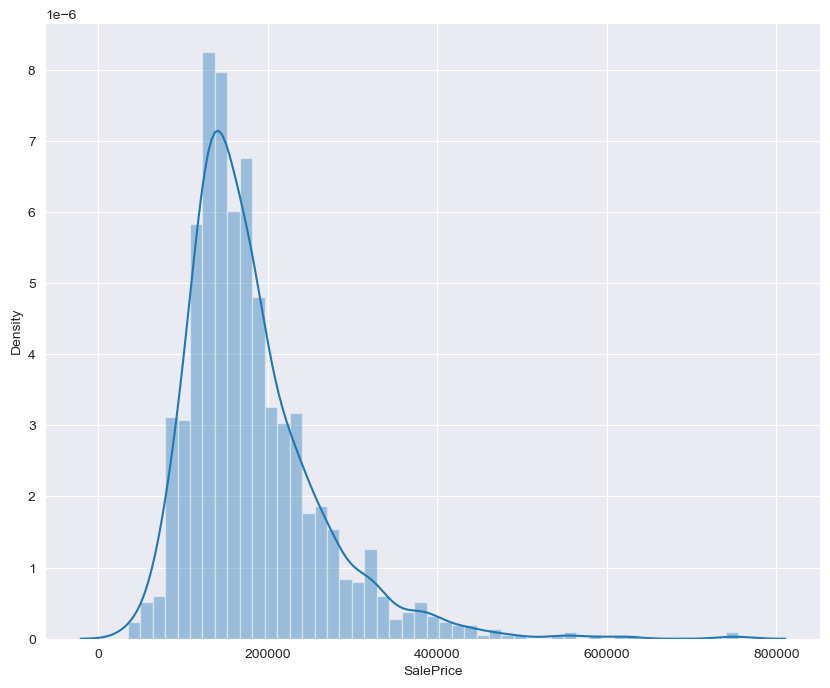

In [2601]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

Since this graph is skewed and the price is very large range let us convert to log scale 

In [2602]:
import numpy as np 
df['SalePrice'] = np.log(df['SalePrice'])

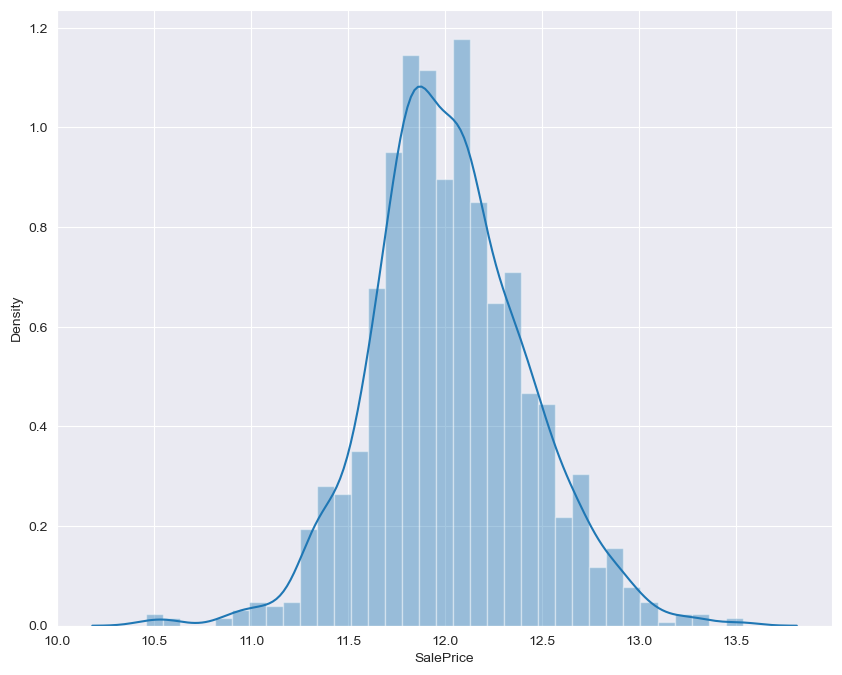

In [2603]:
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

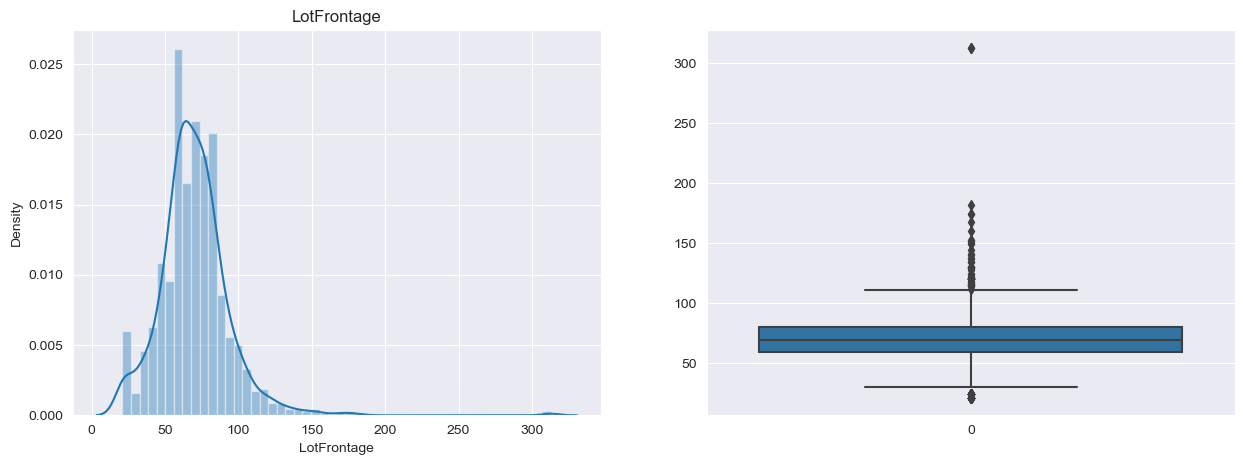

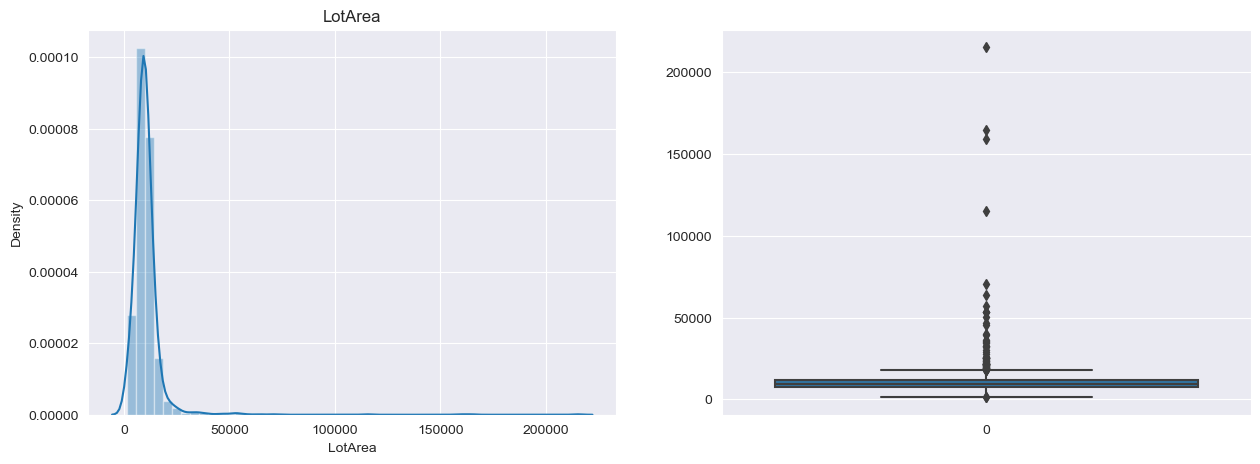

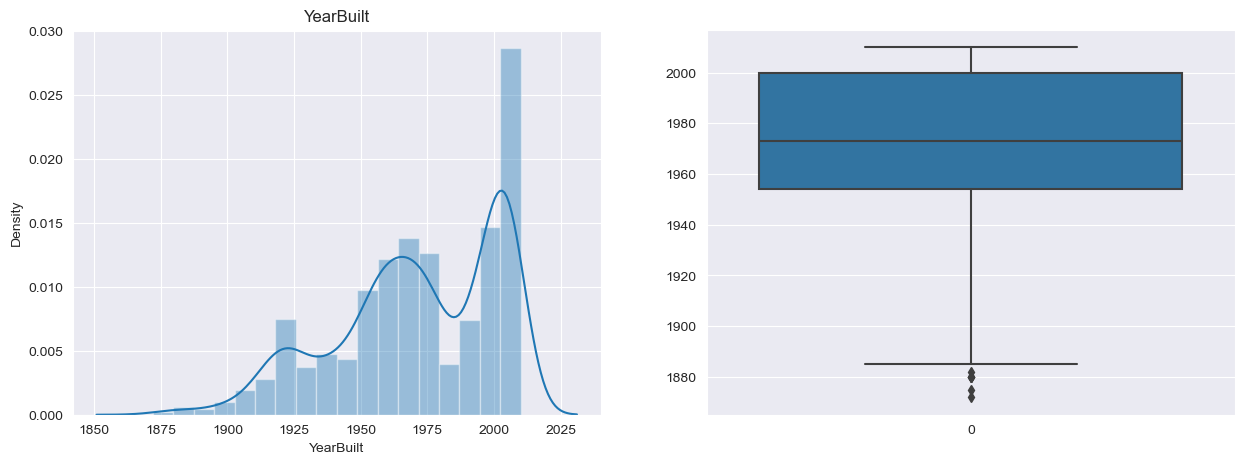

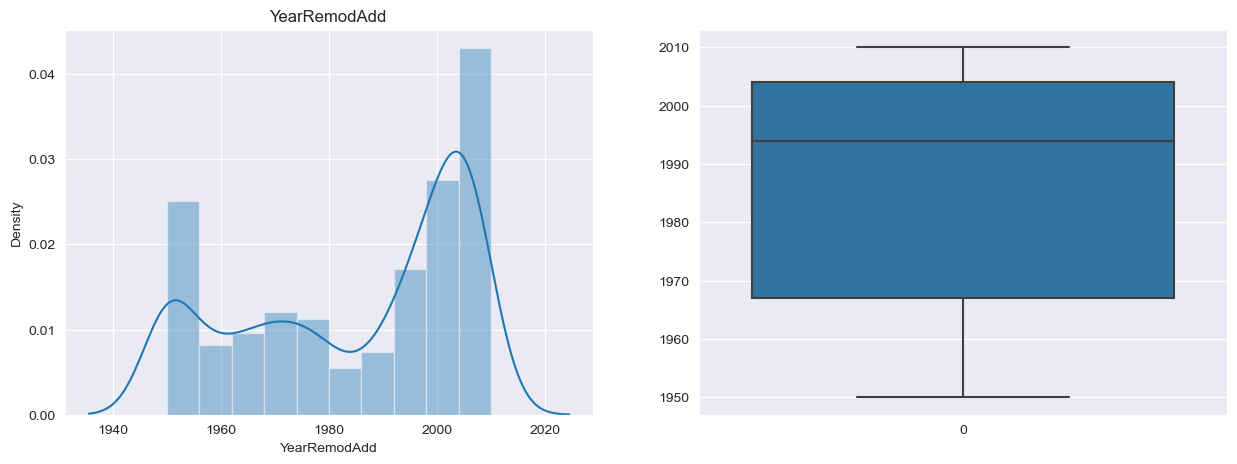

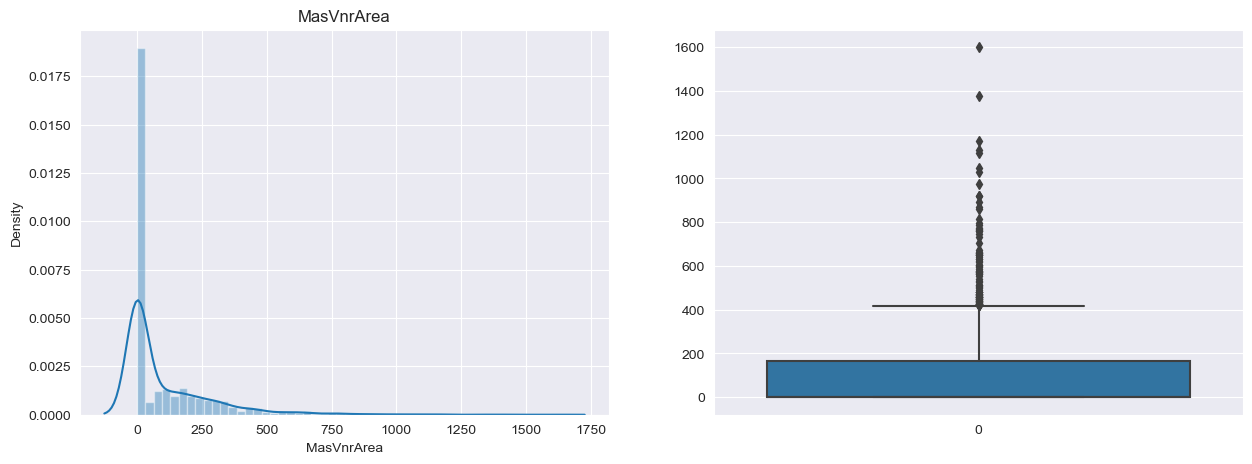

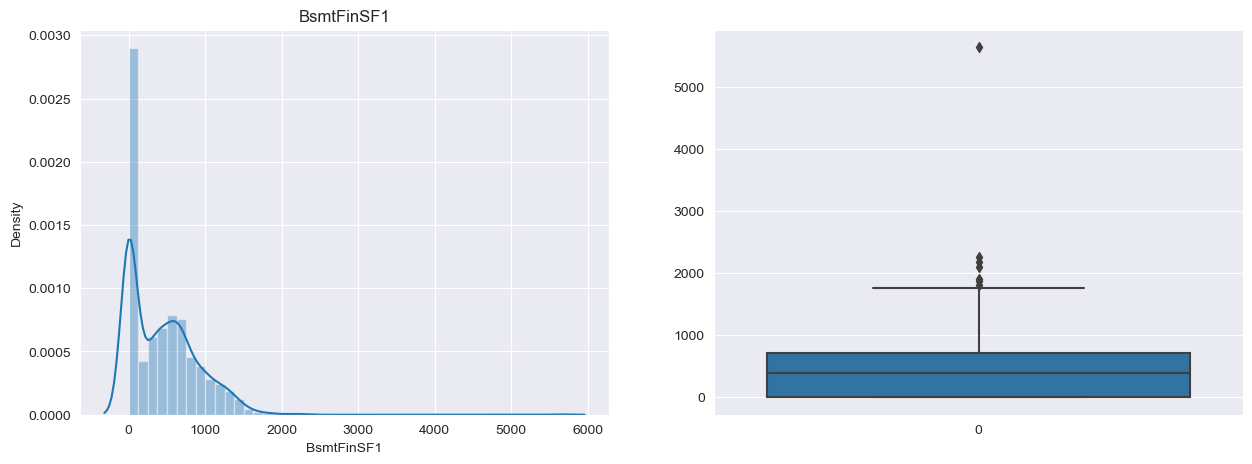

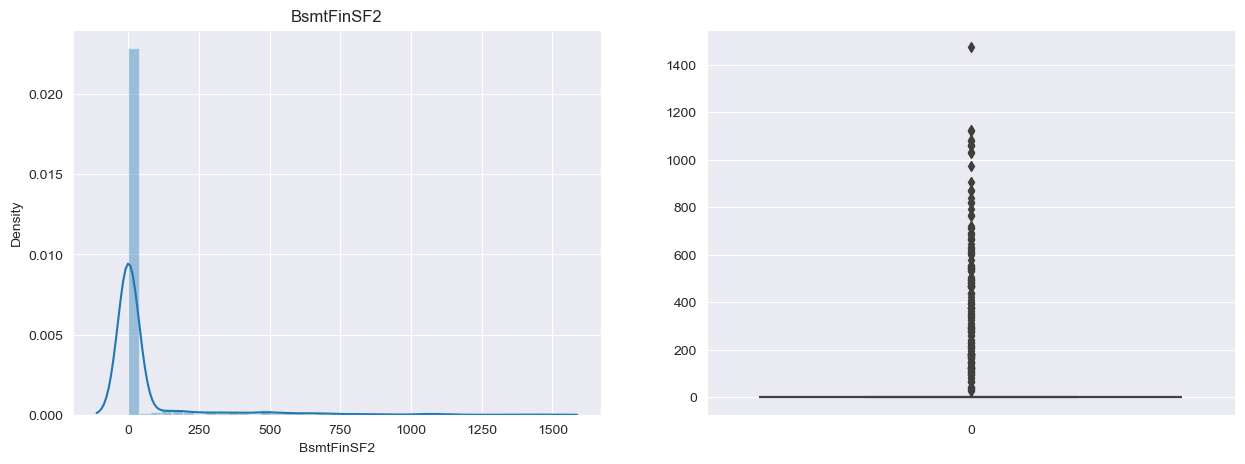

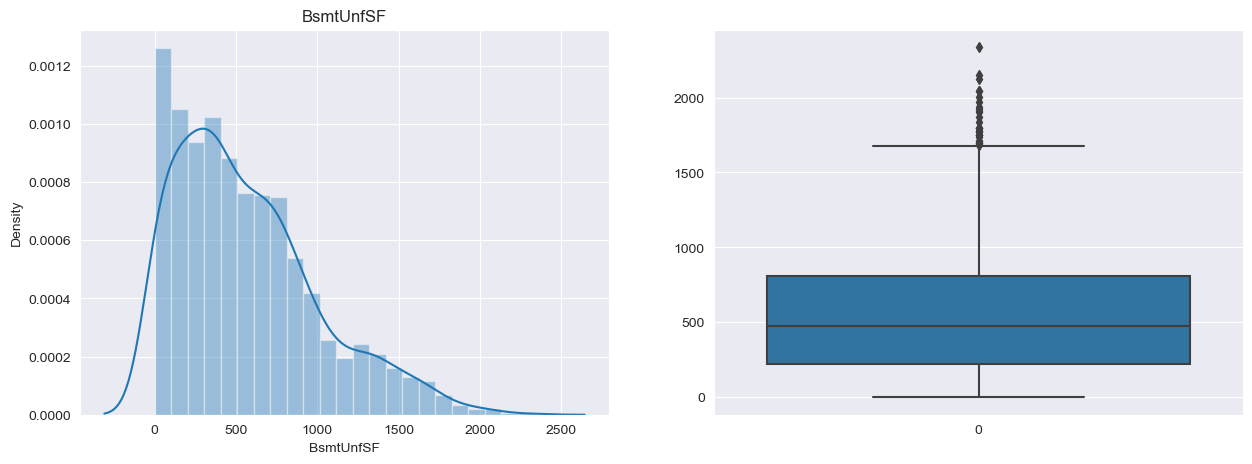

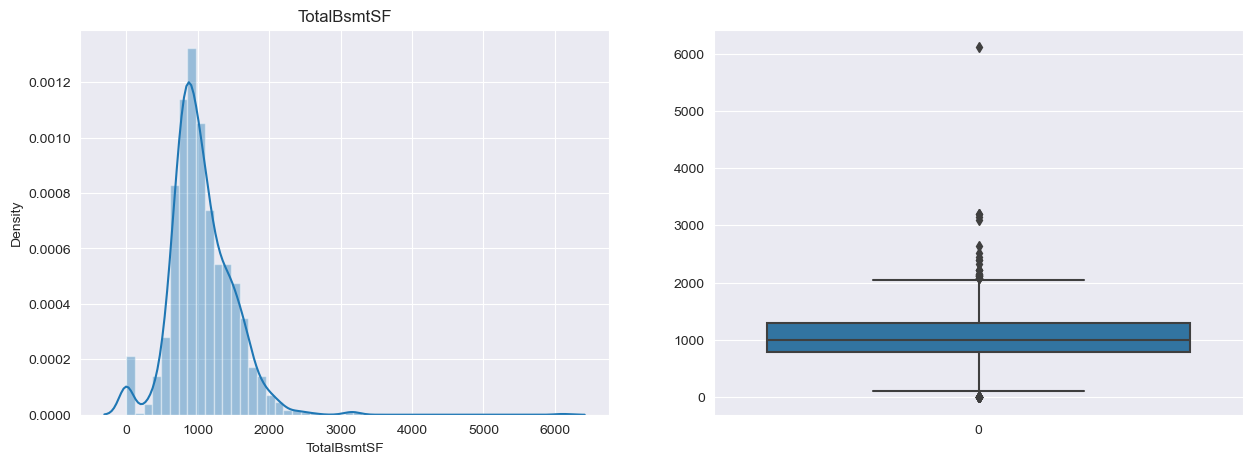

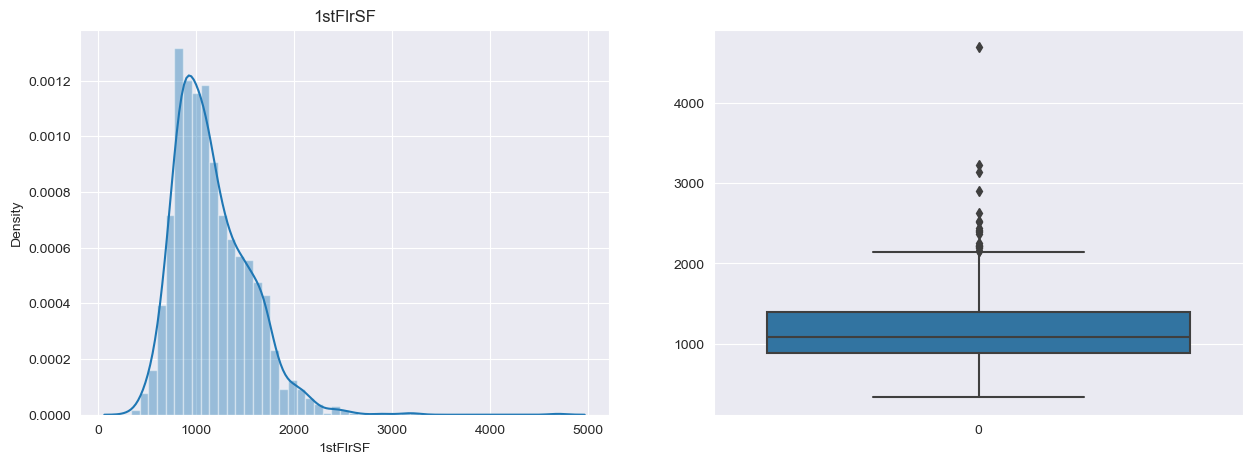

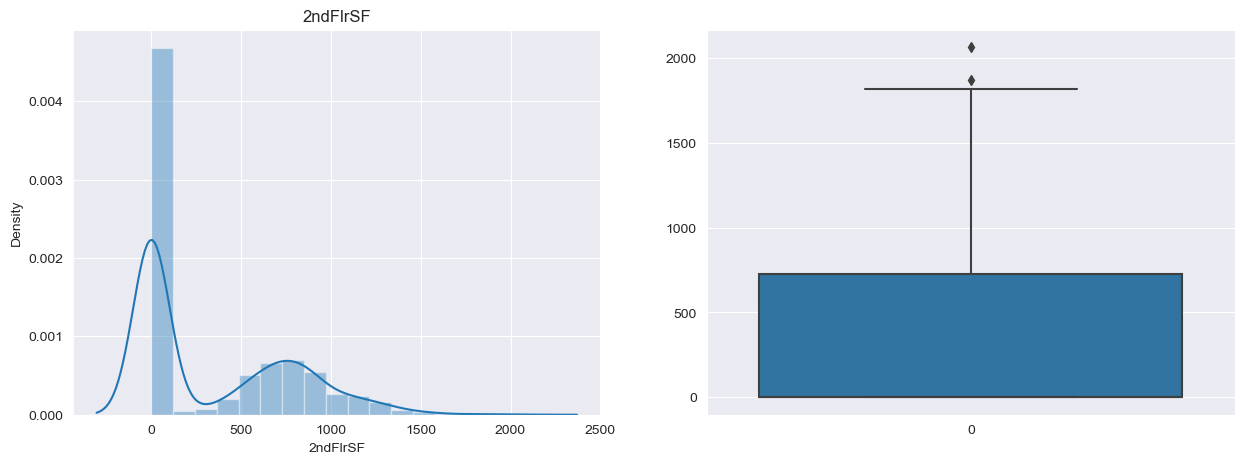

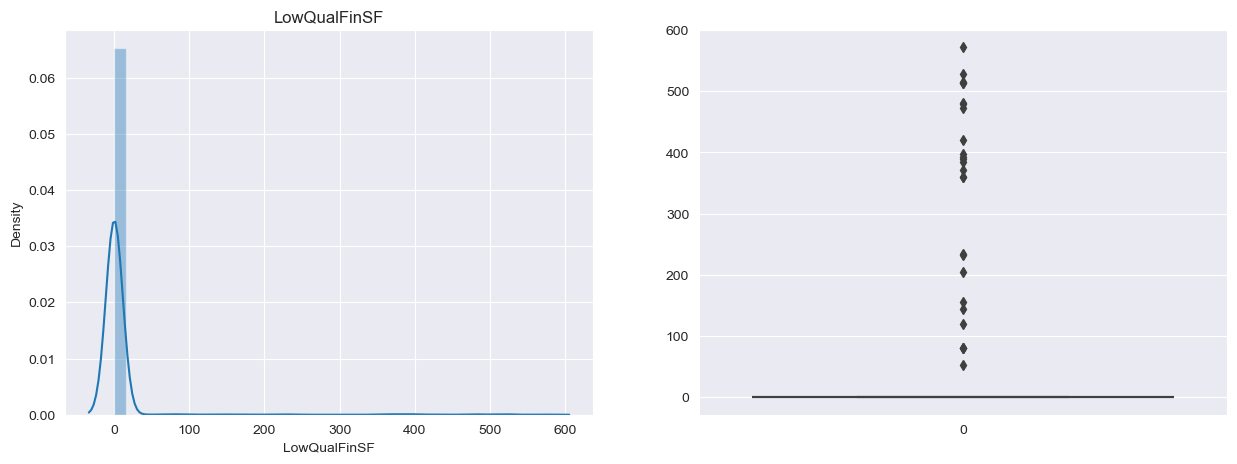

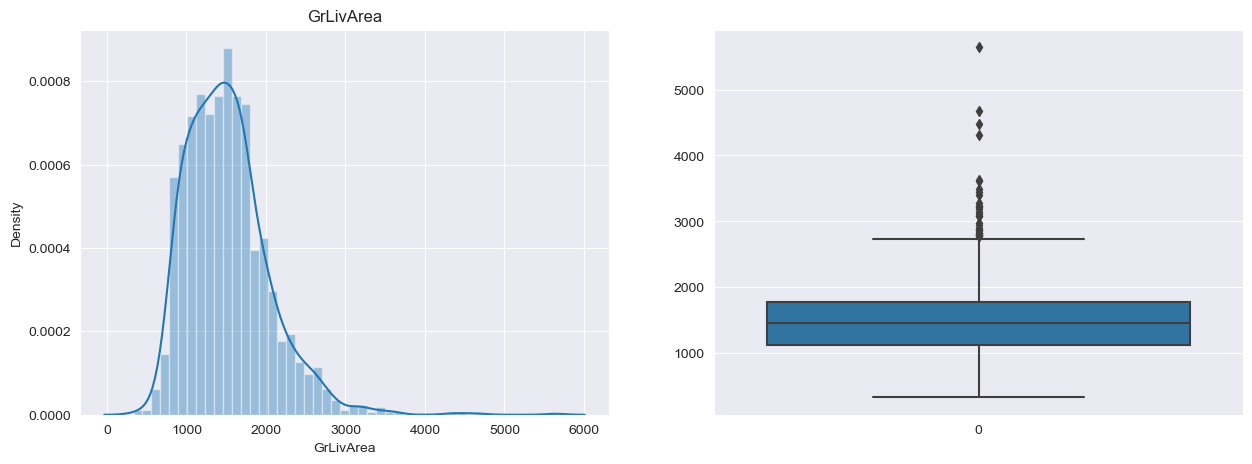

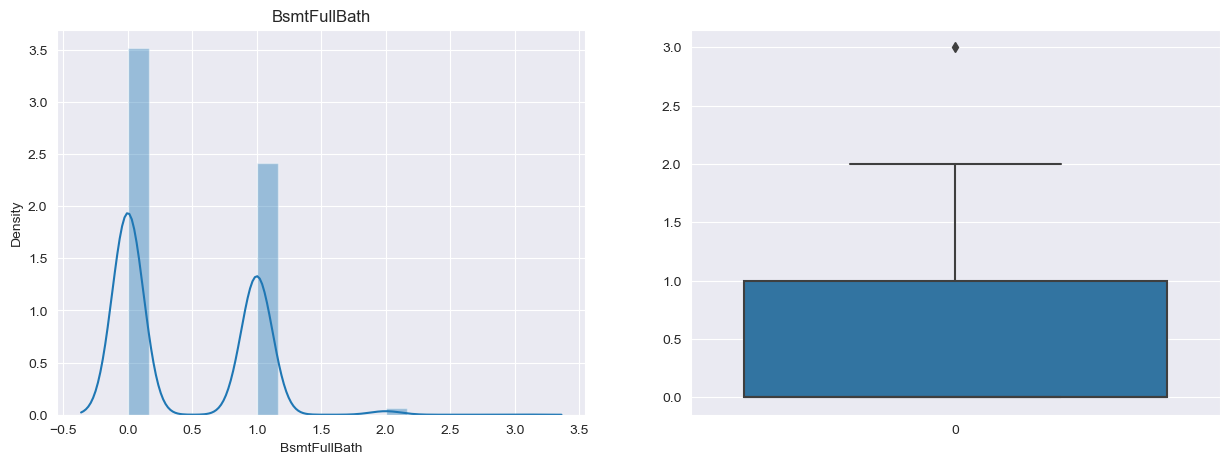

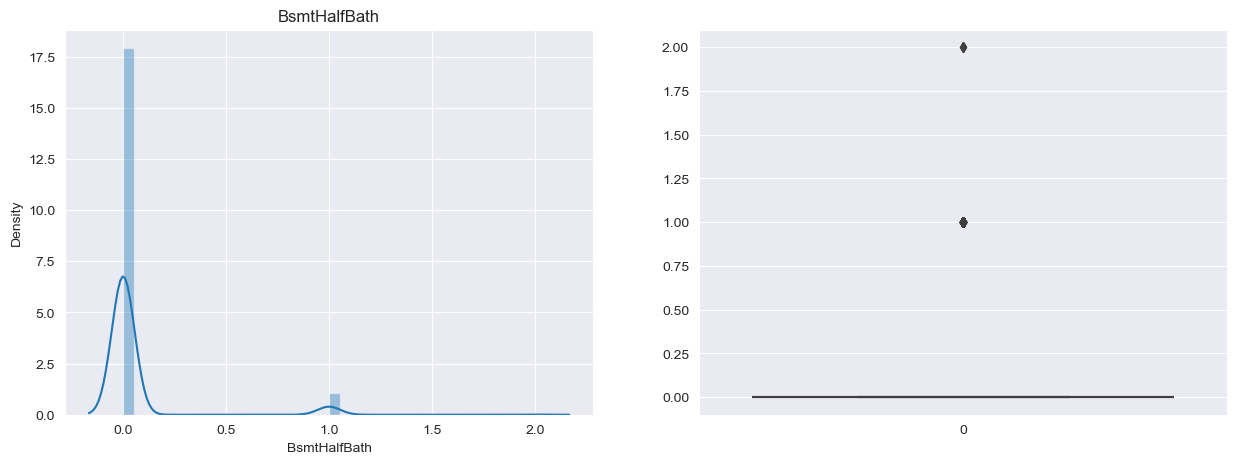

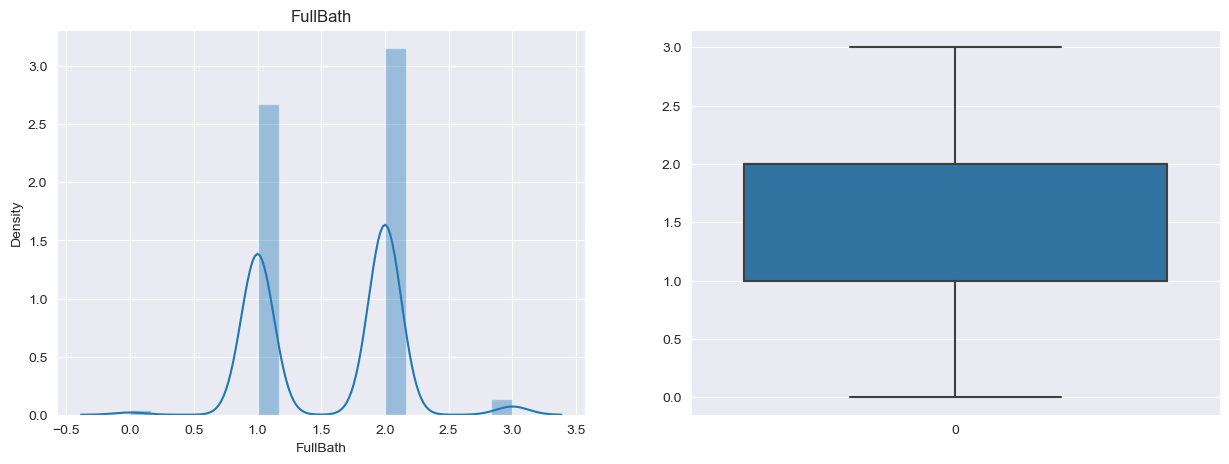

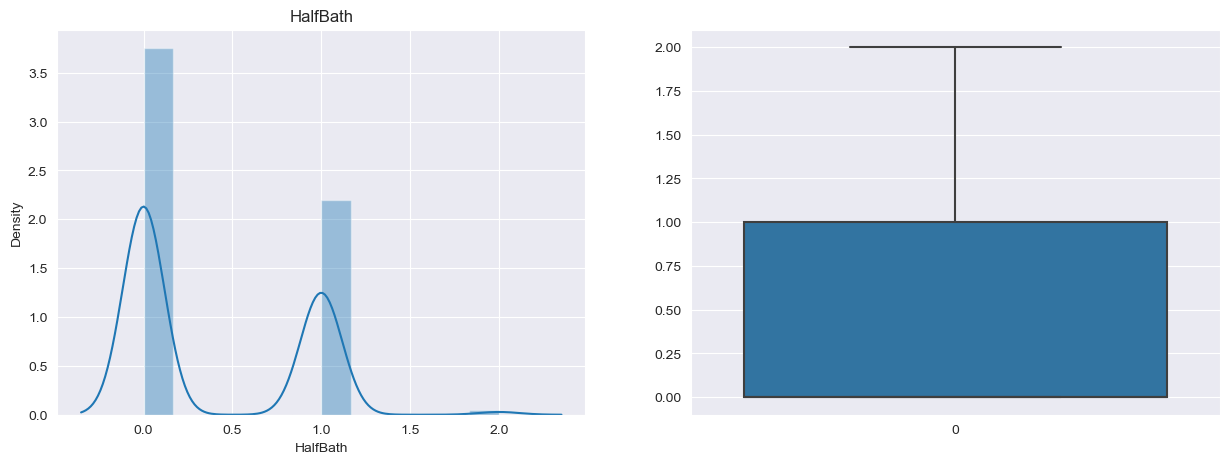

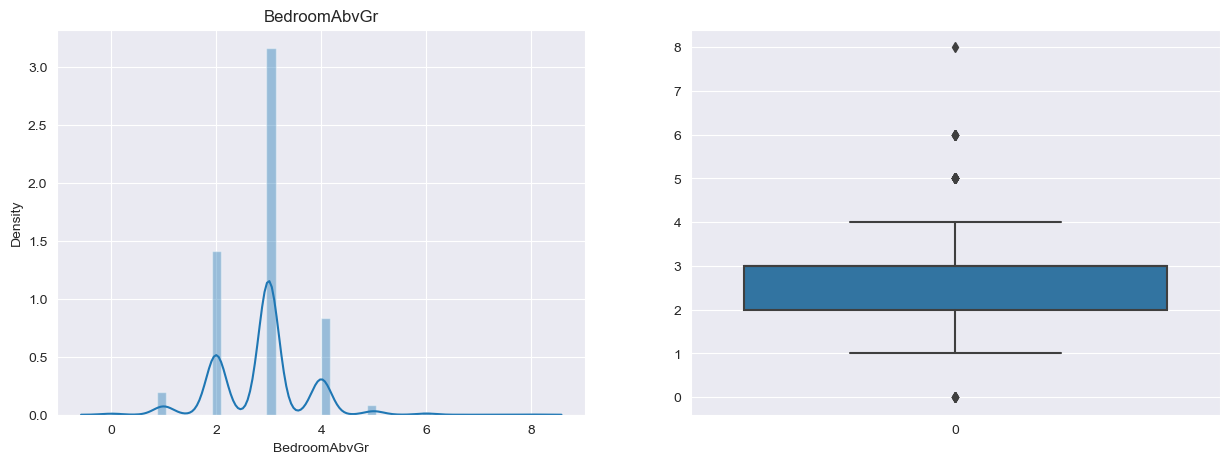

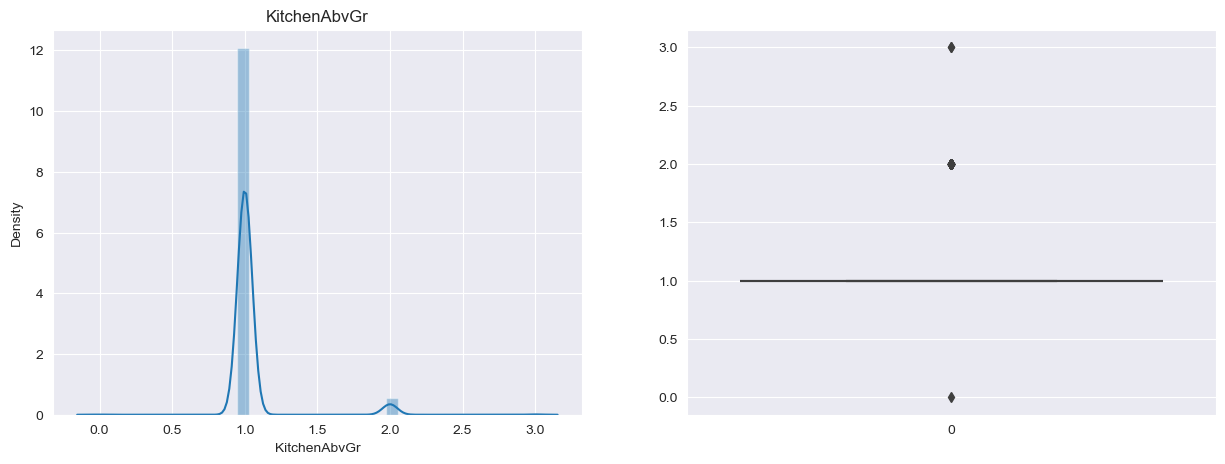

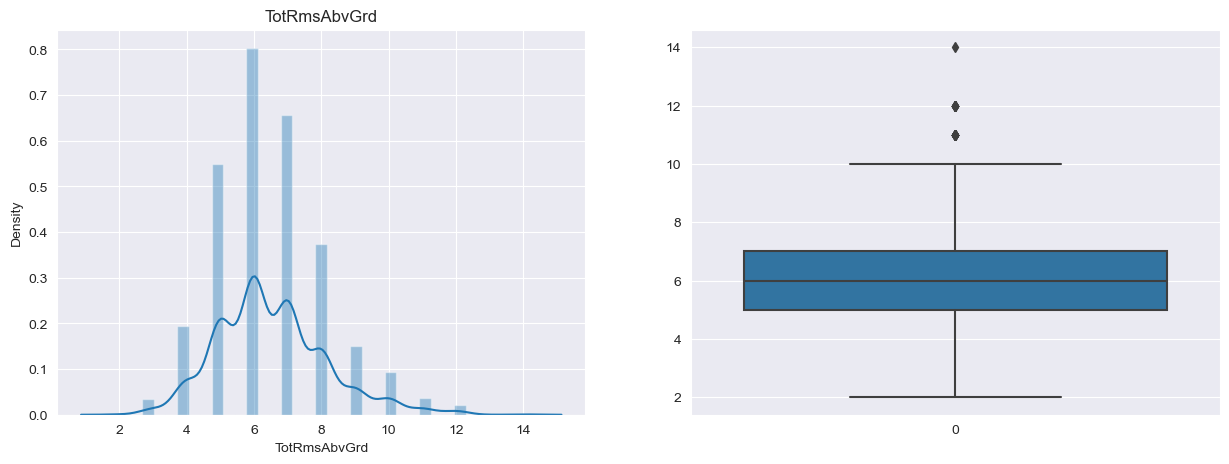

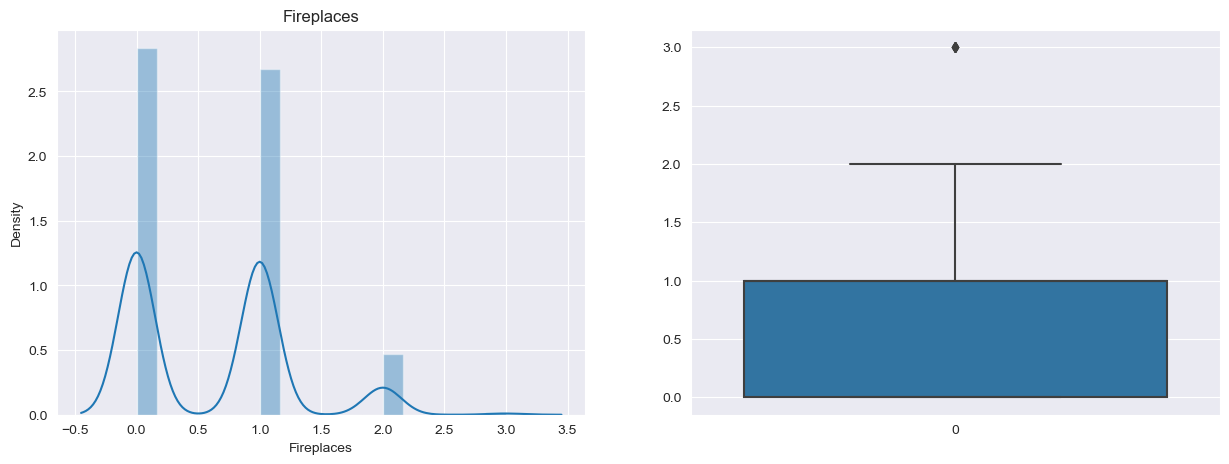

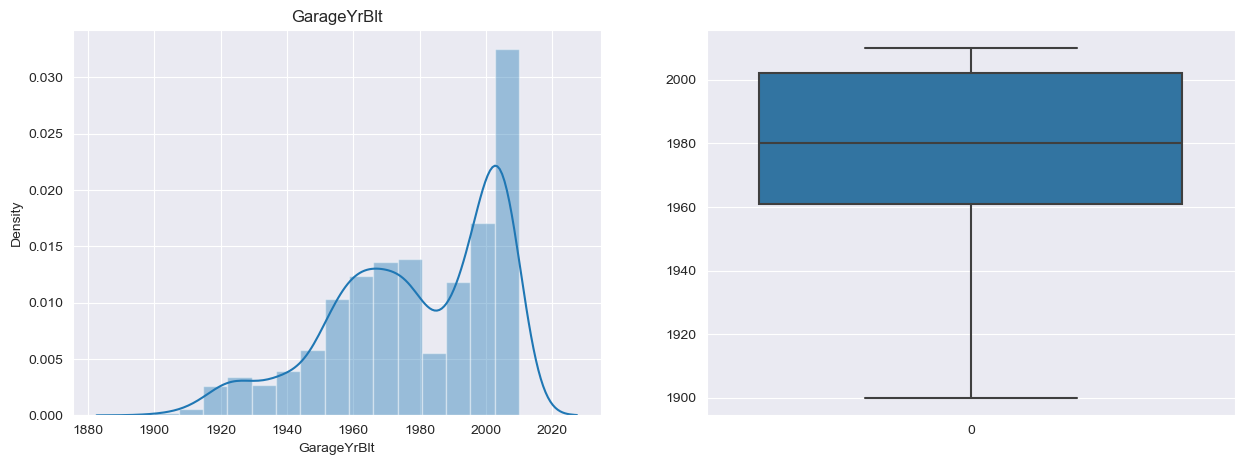

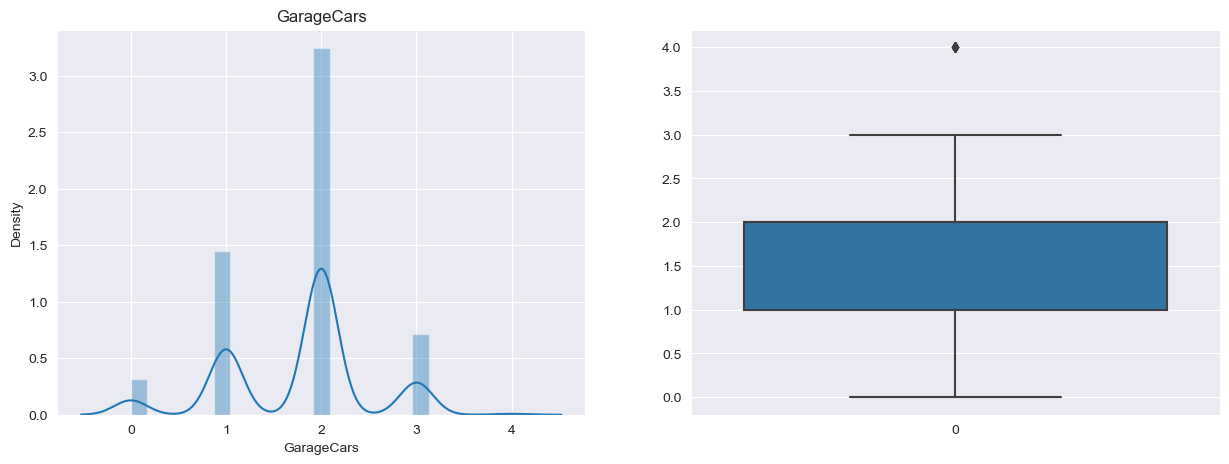

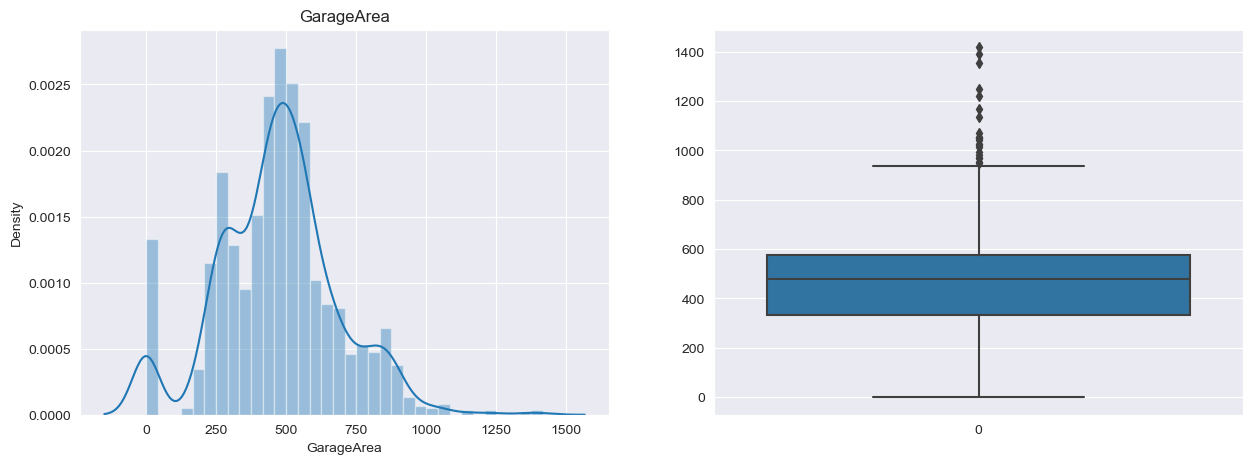

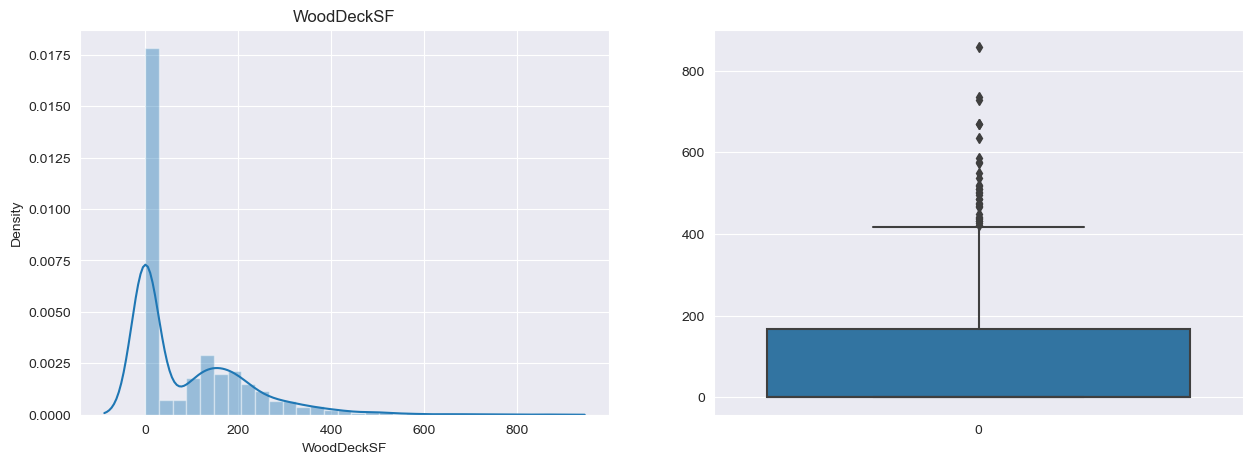

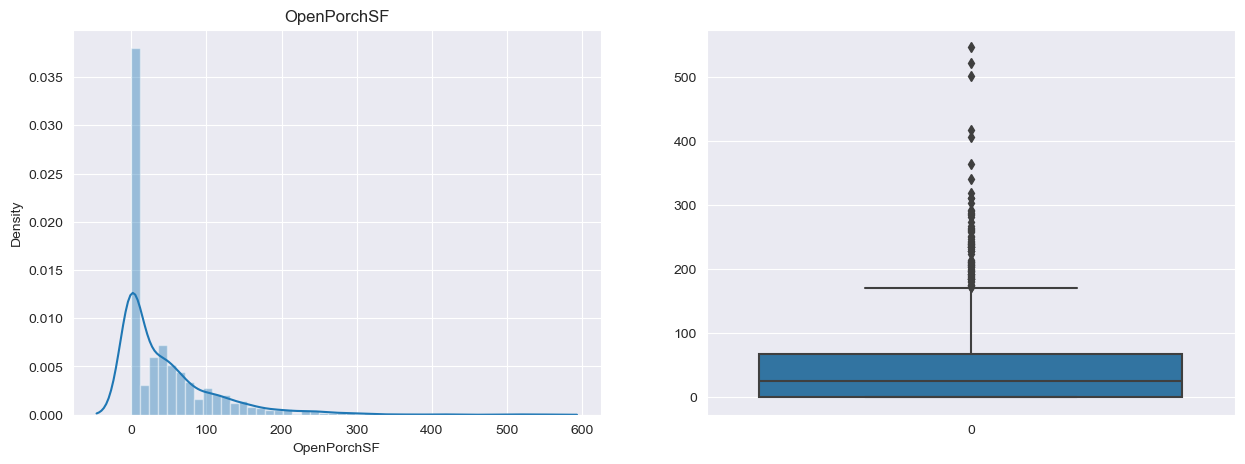

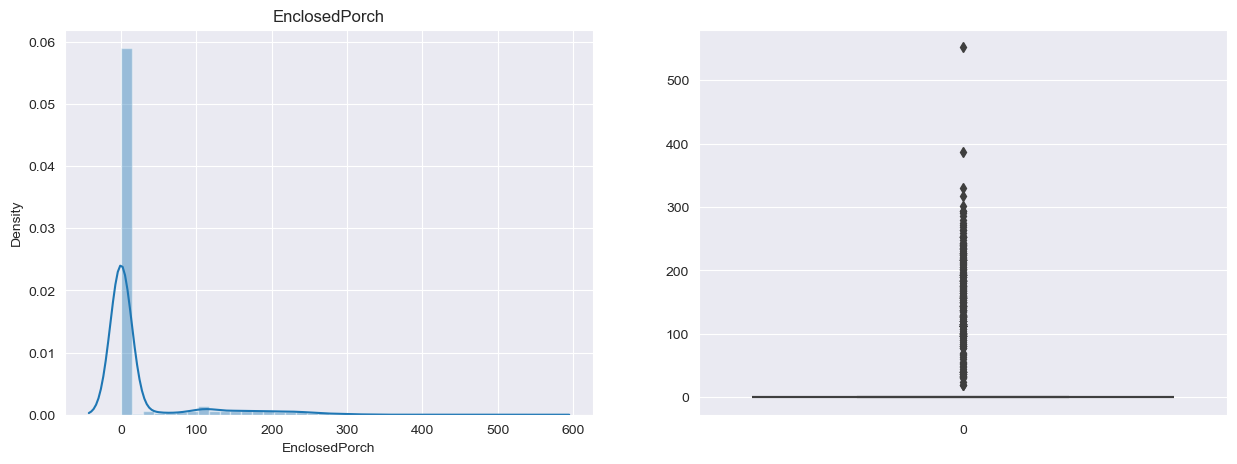

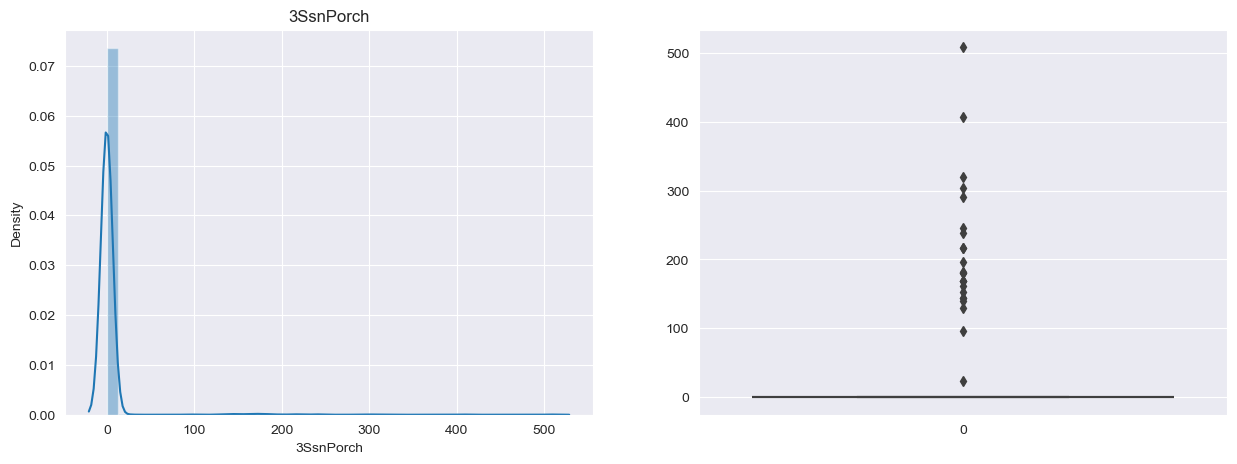

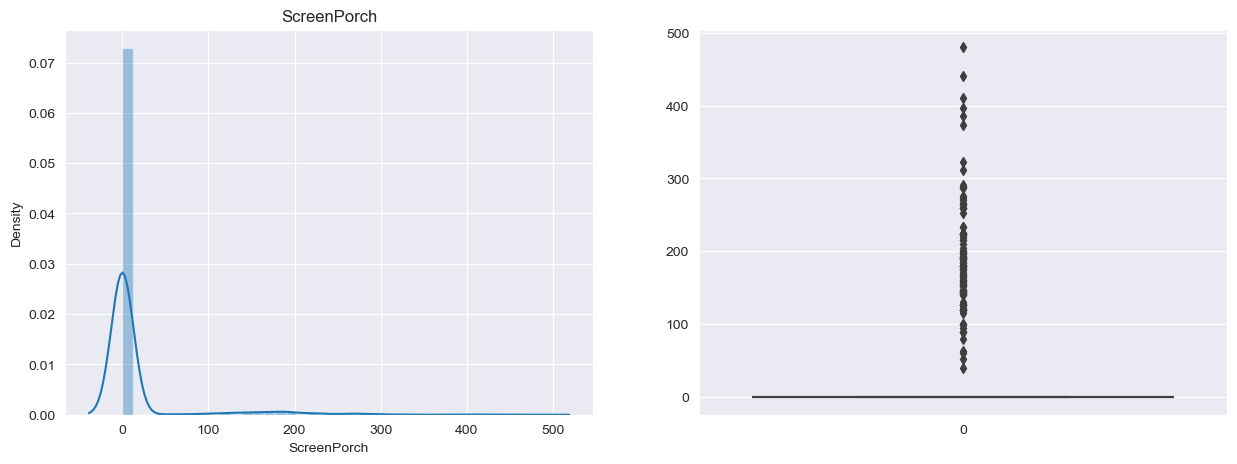

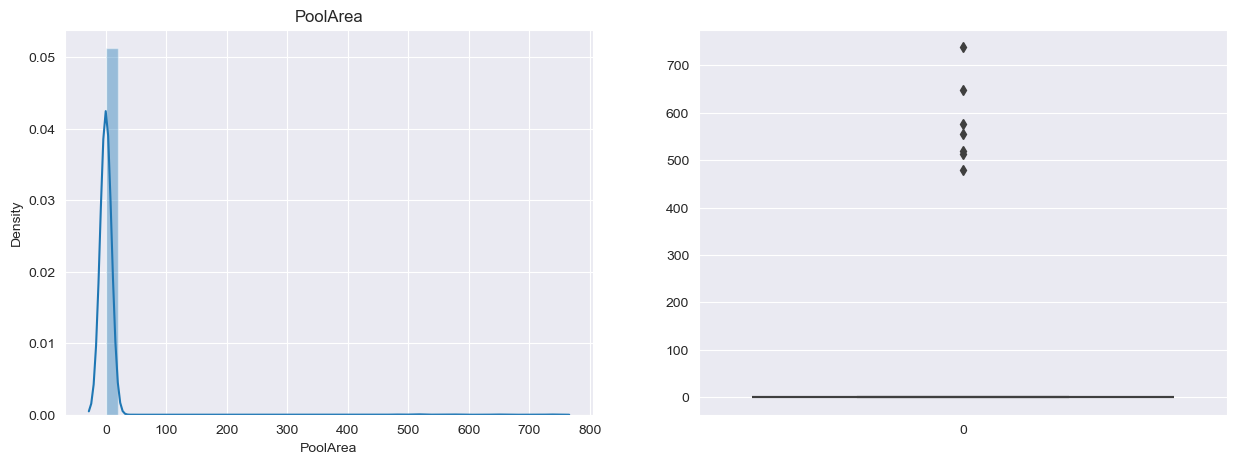

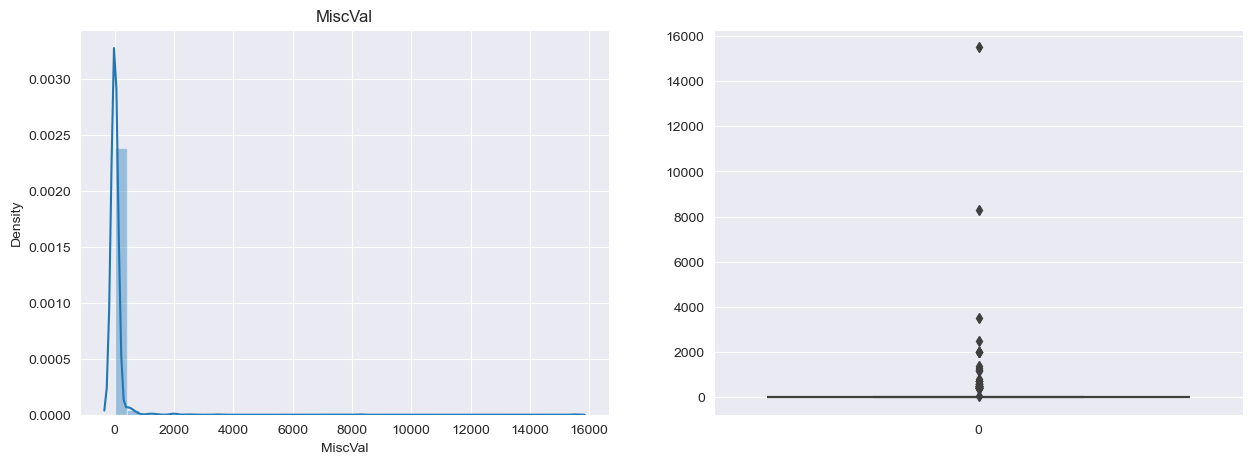

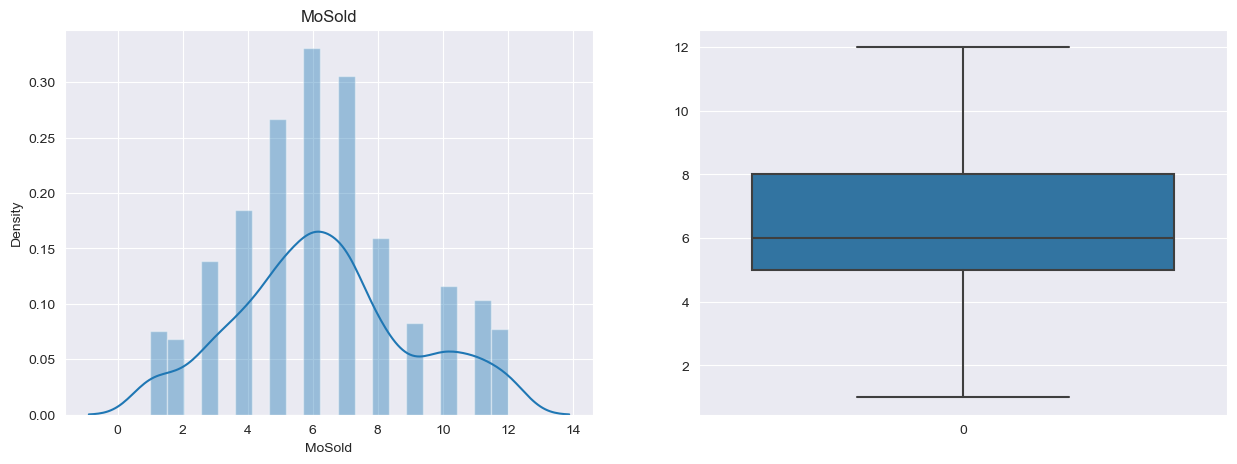

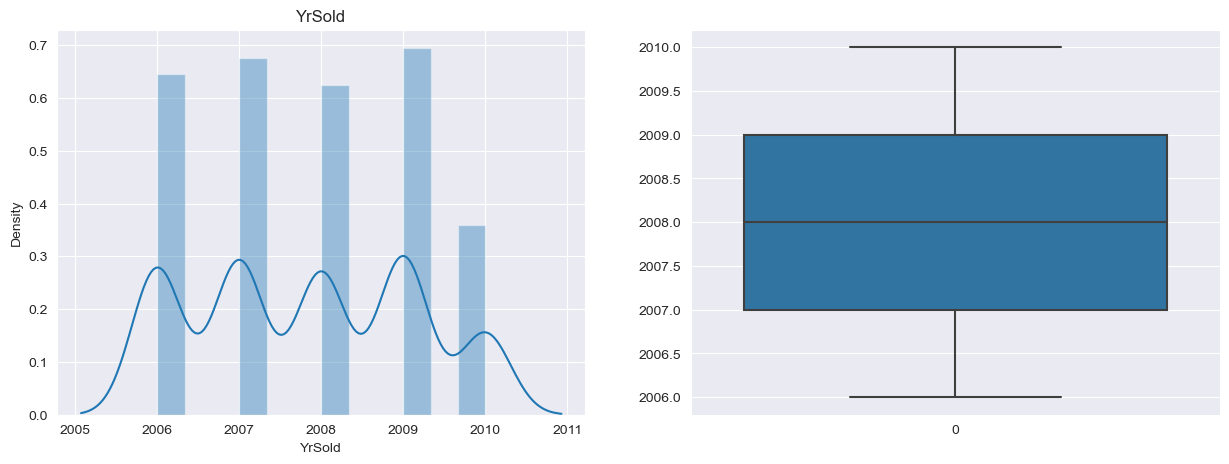

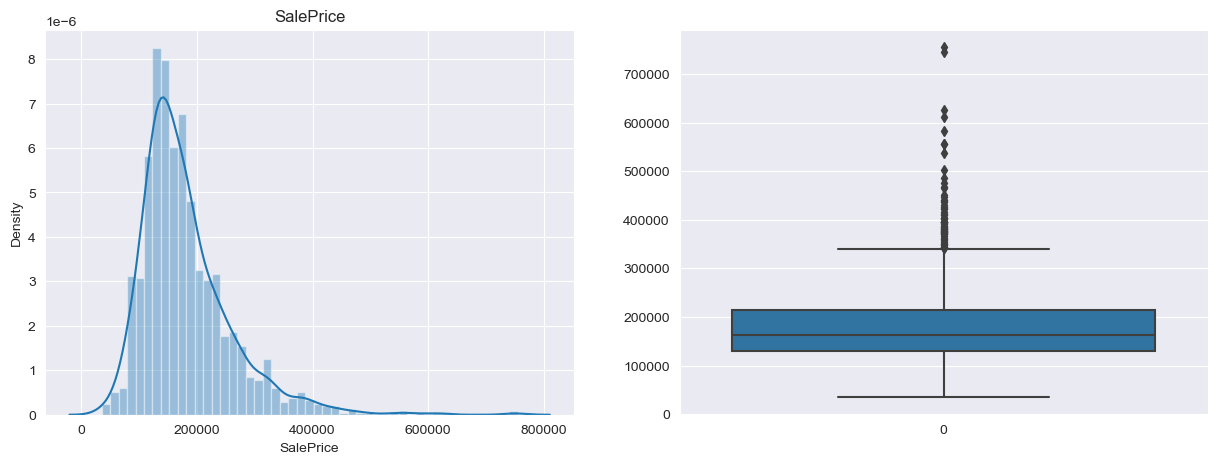

In [2604]:
for col in num_columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show() 

Observation: Many of the numerical values have non-normal distribution

#### Analyse Values in categorical columns

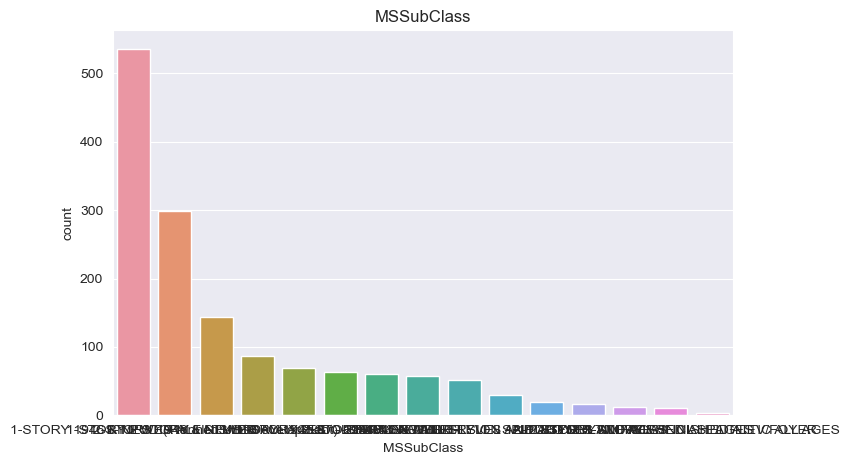

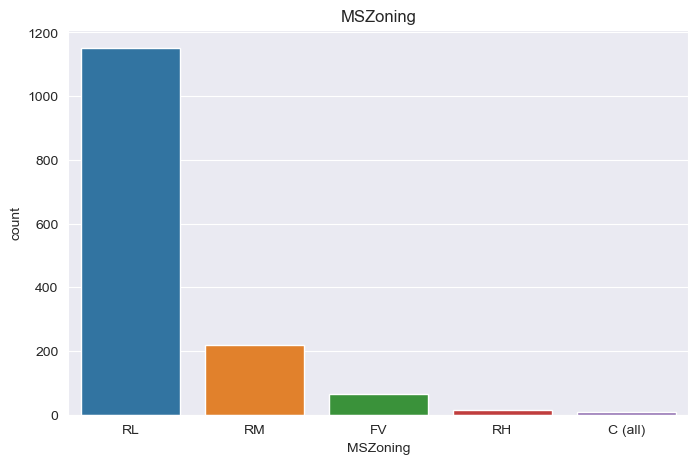

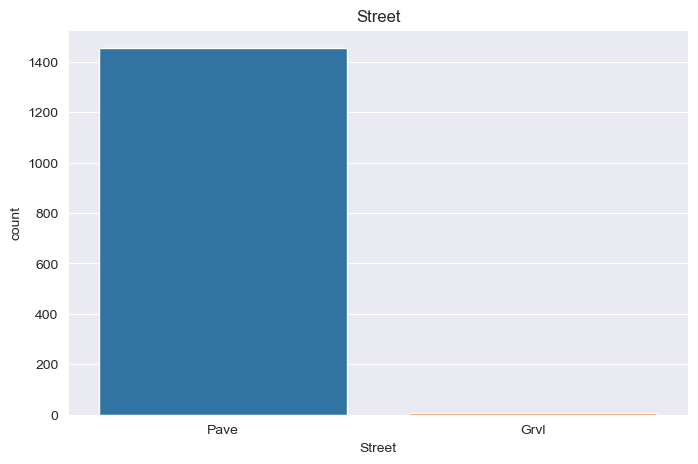

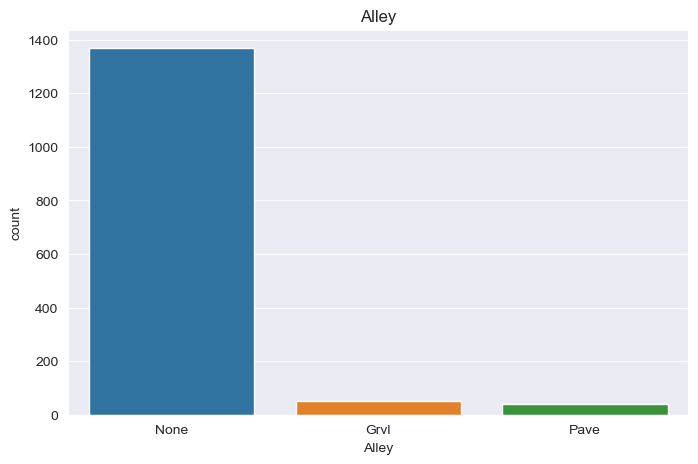

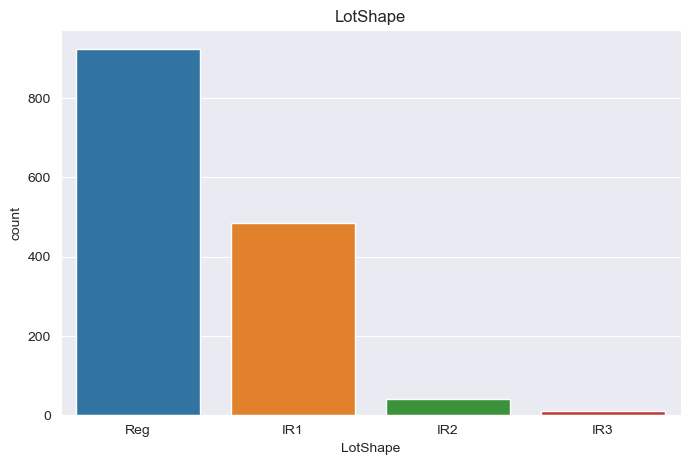

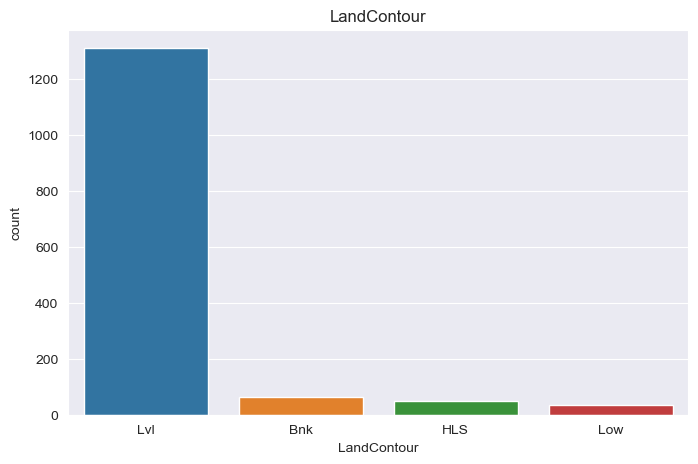

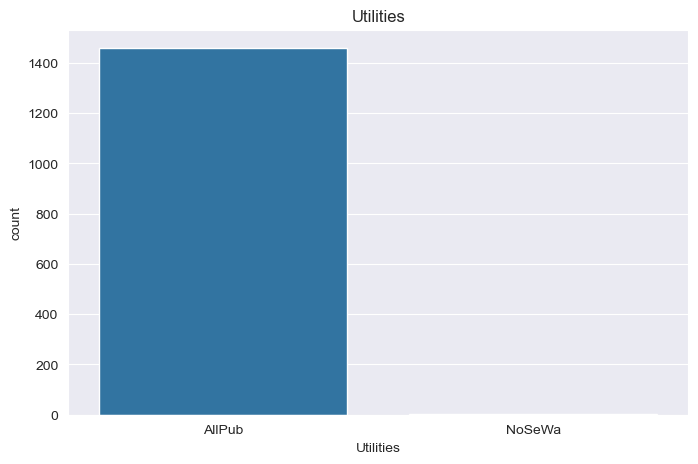

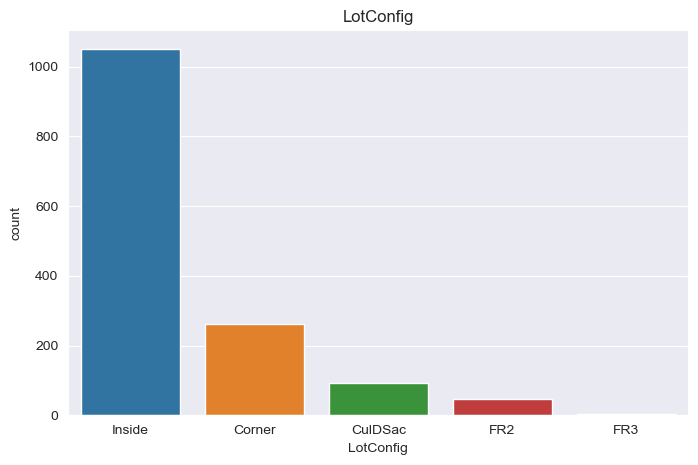

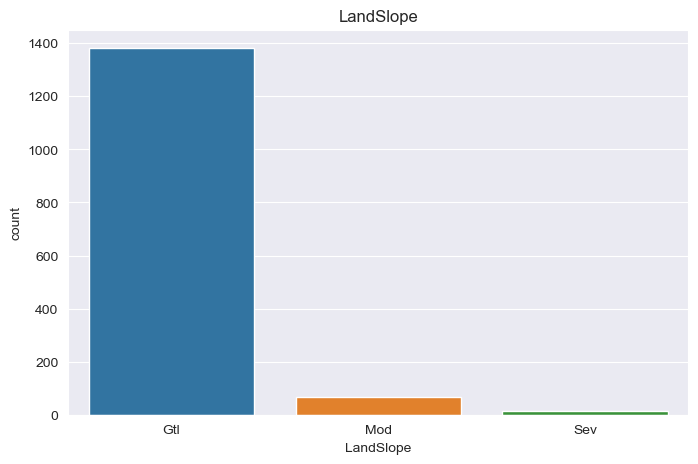

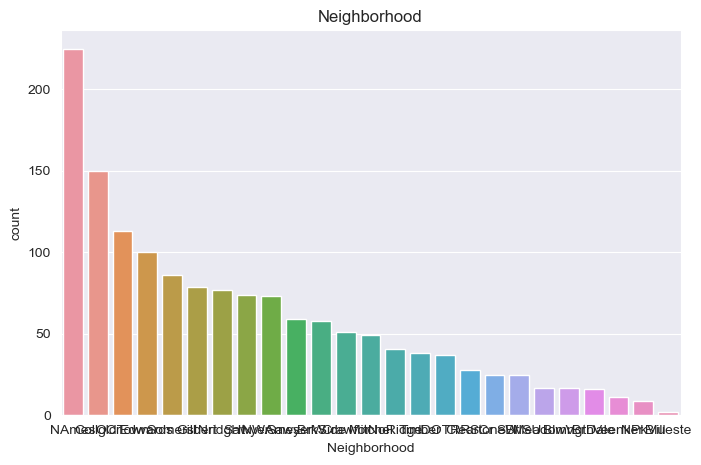

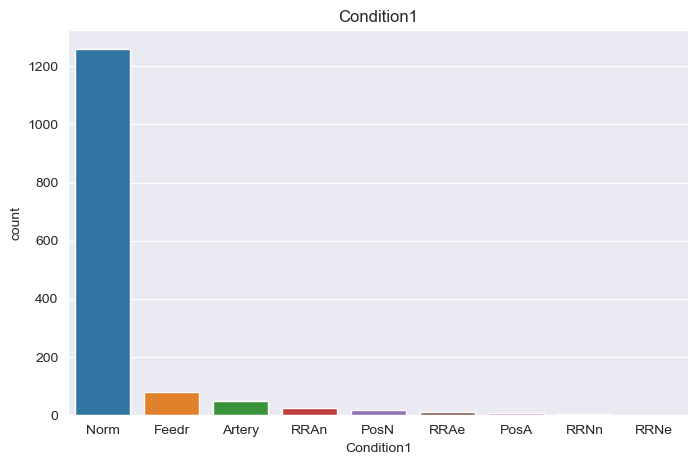

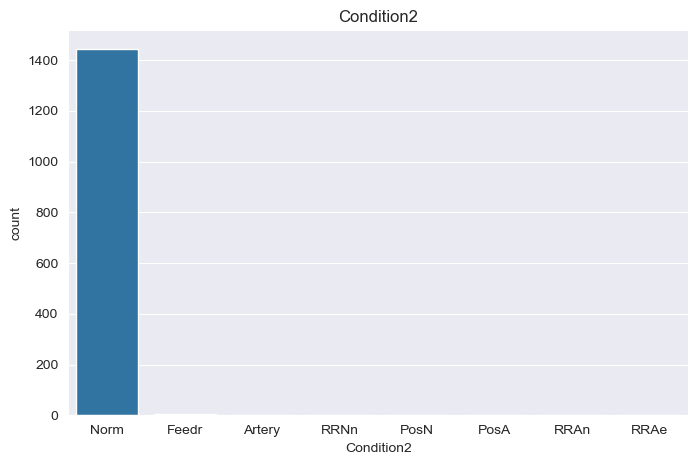

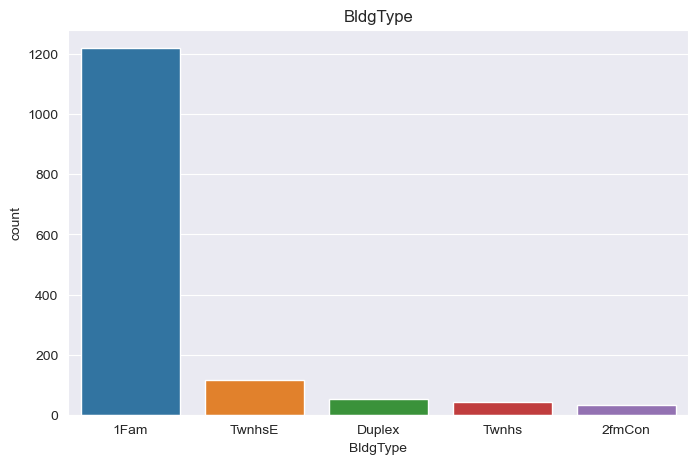

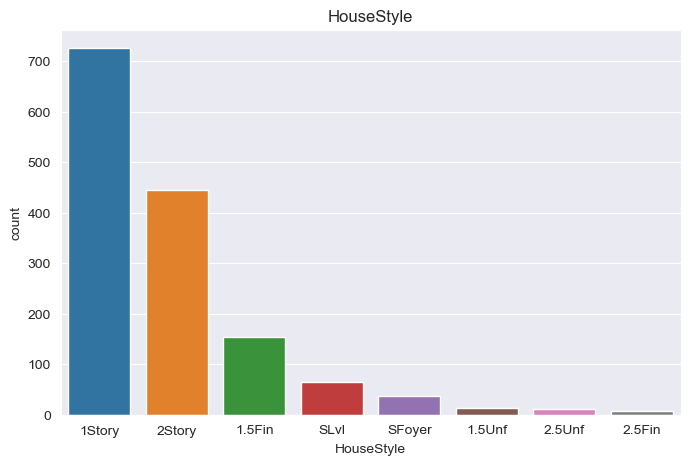

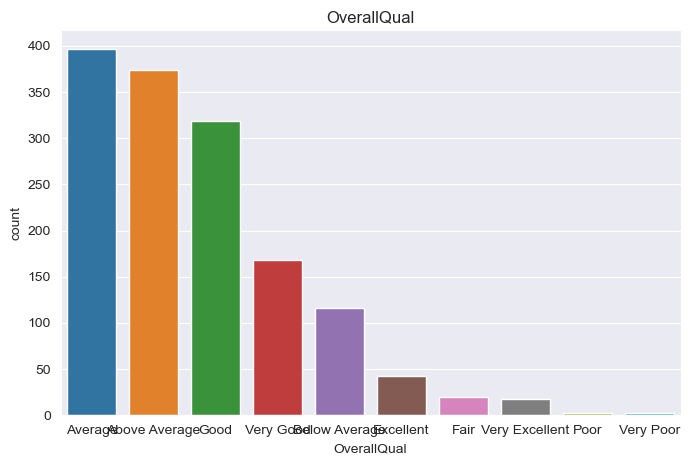

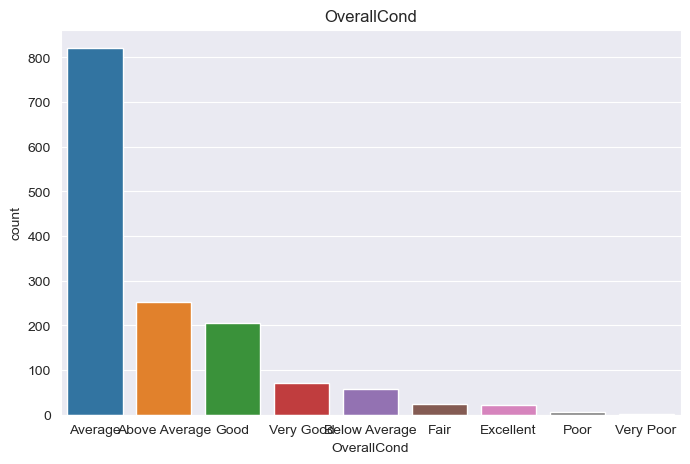

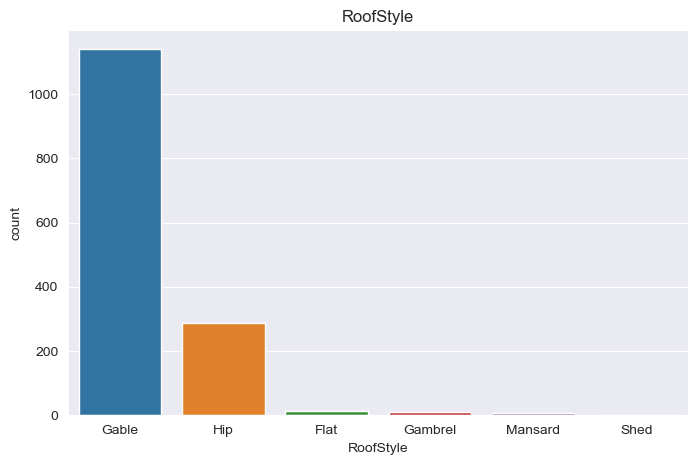

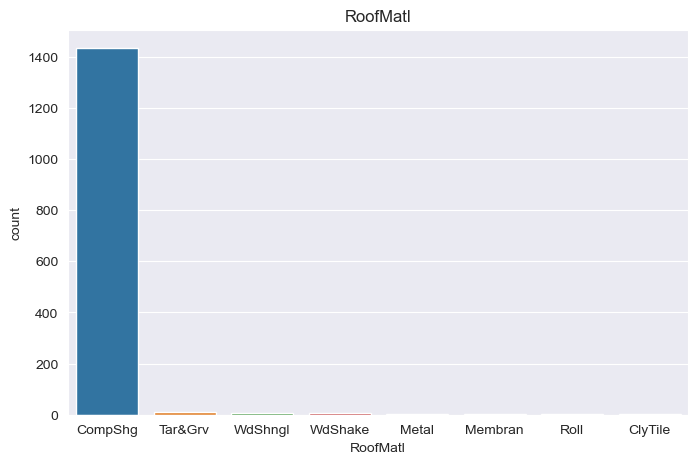

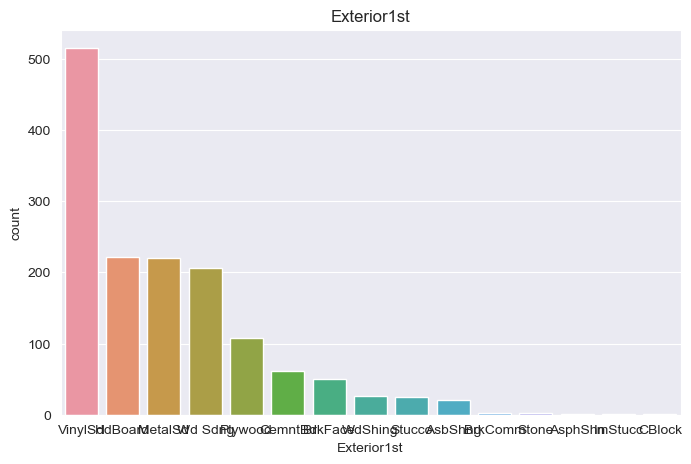

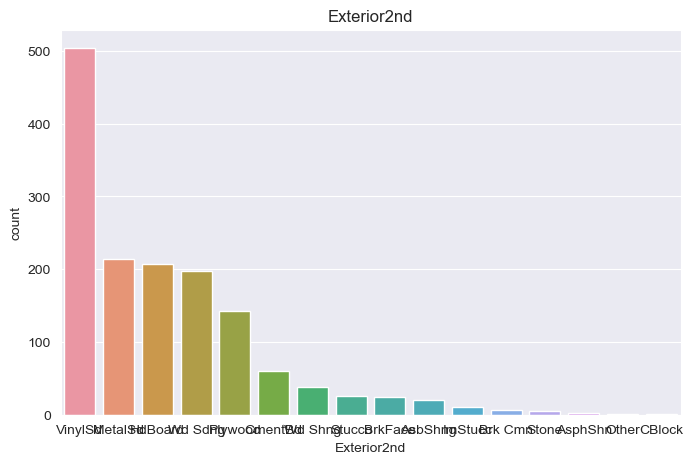

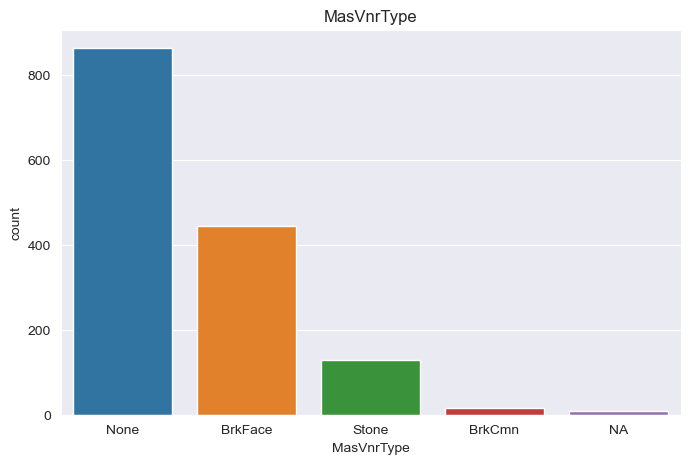

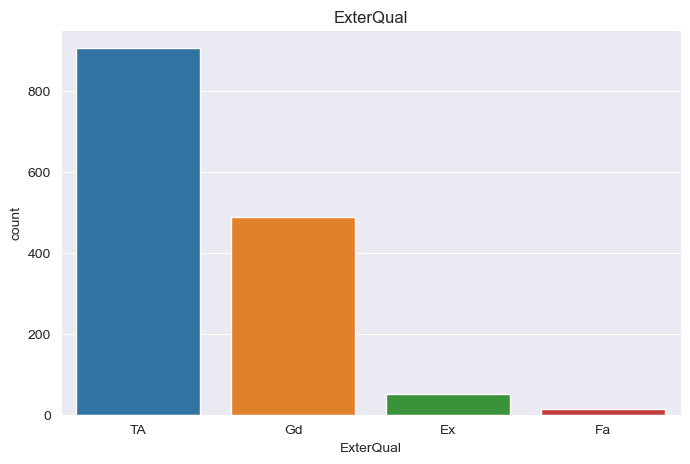

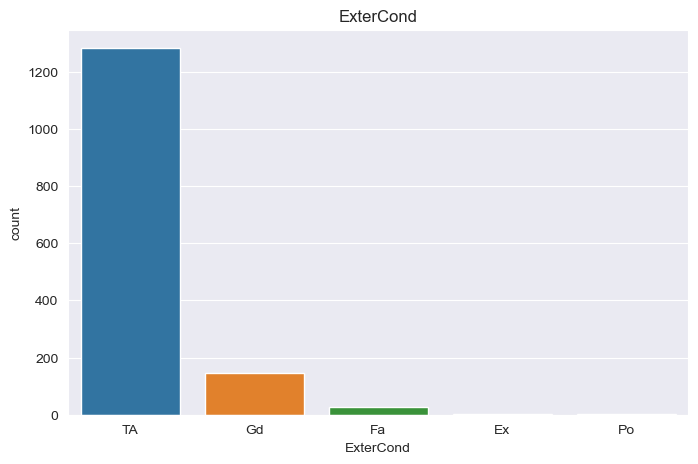

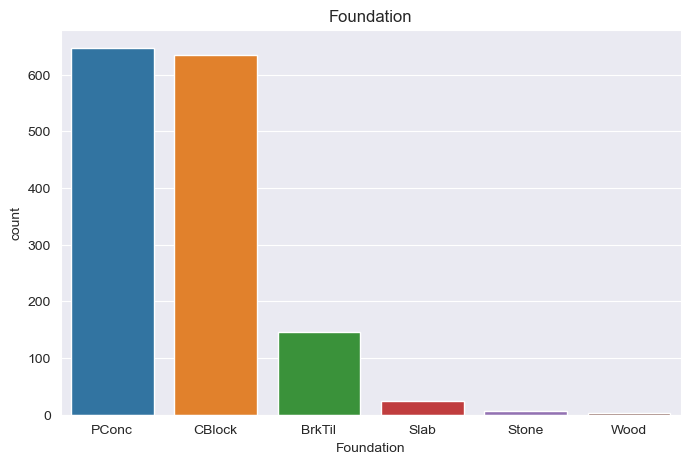

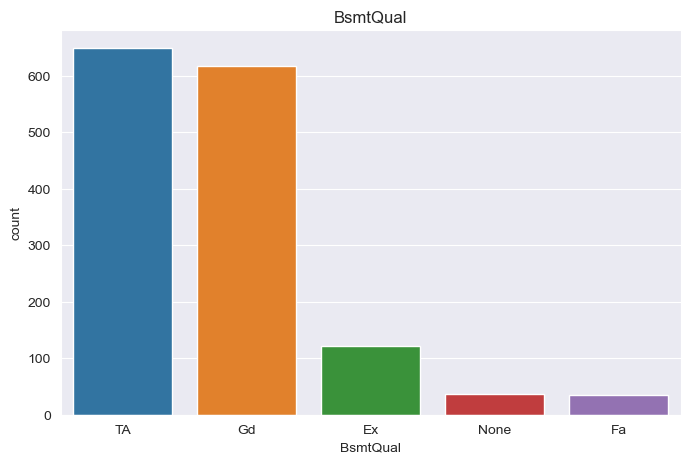

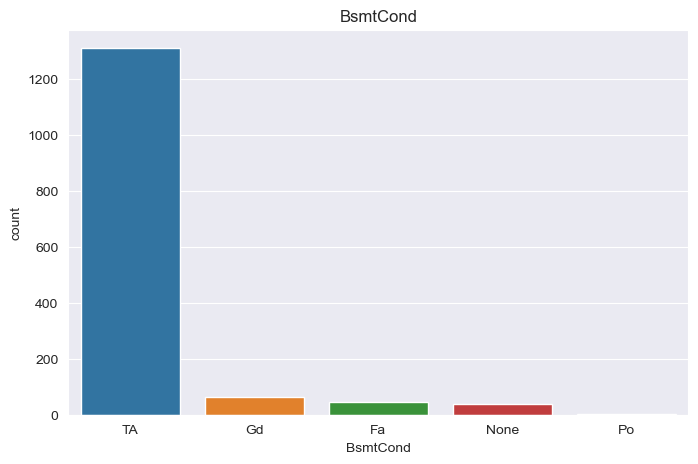

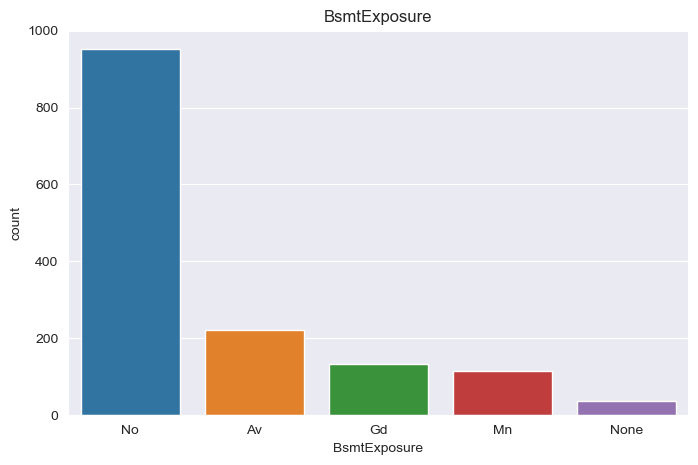

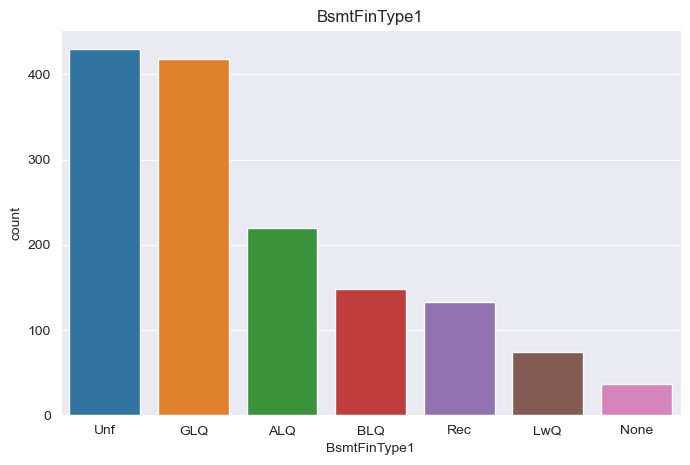

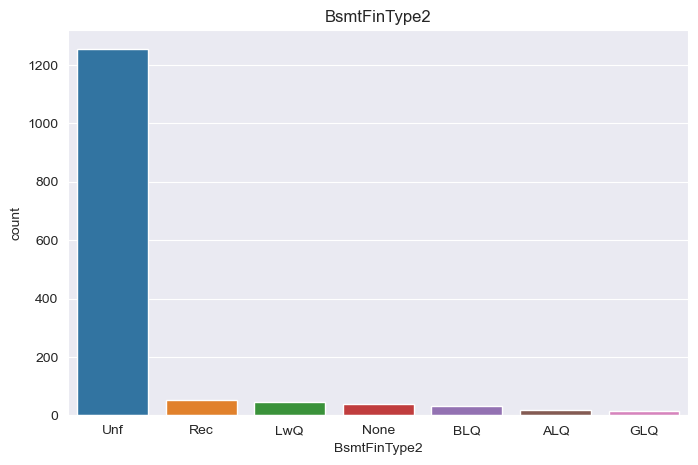

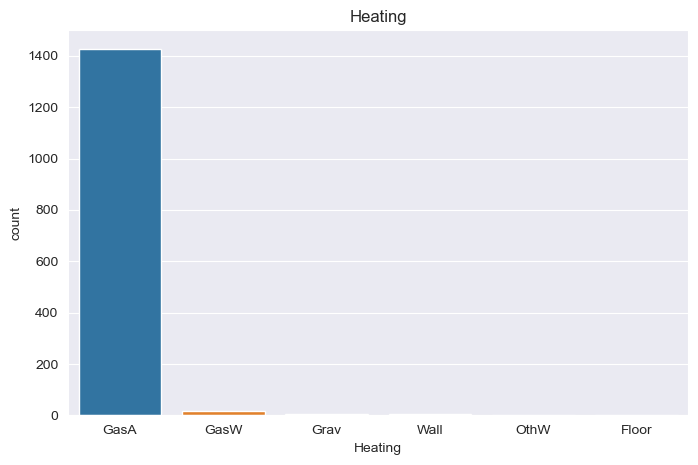

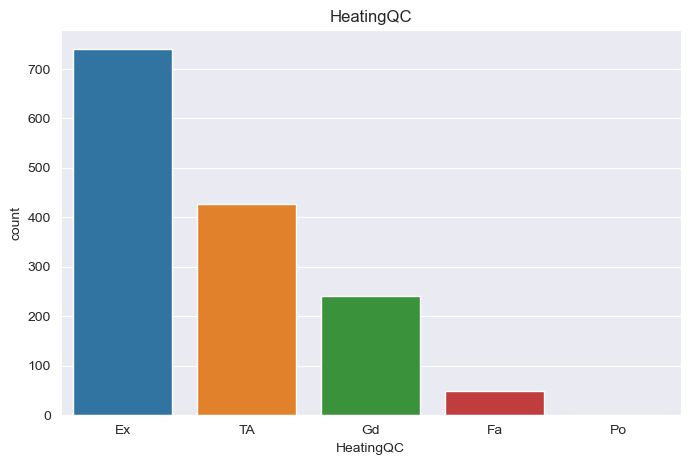

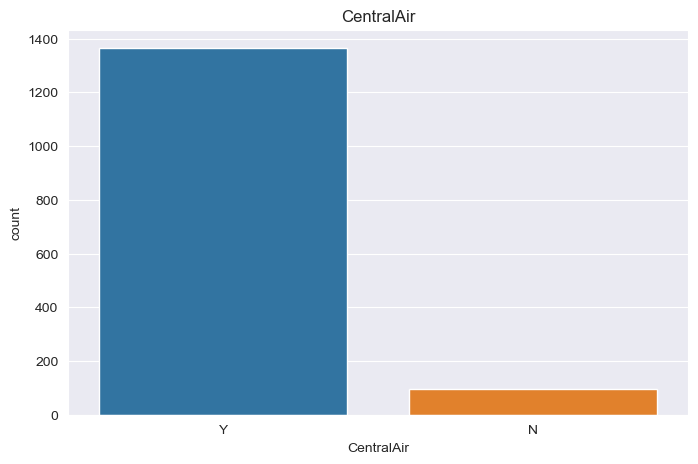

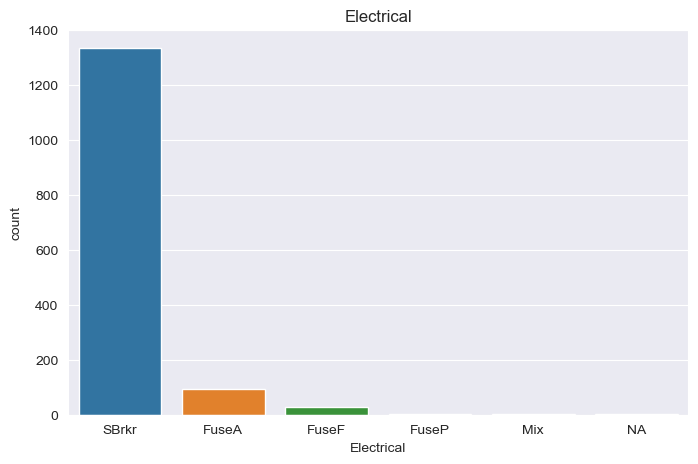

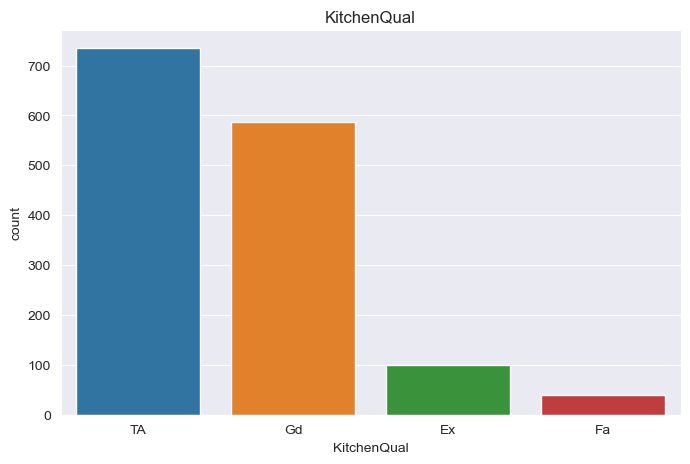

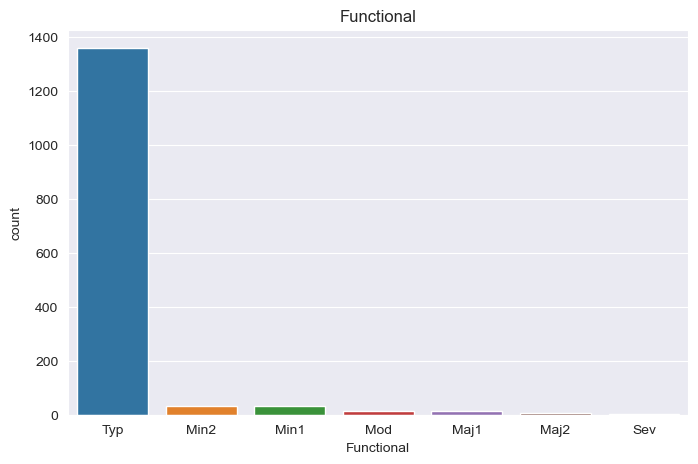

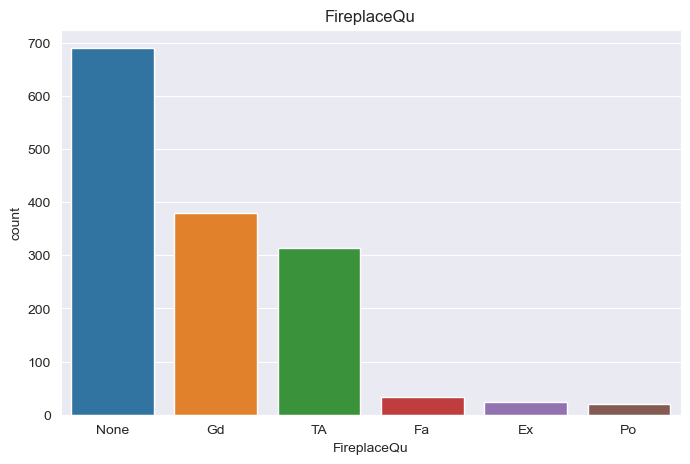

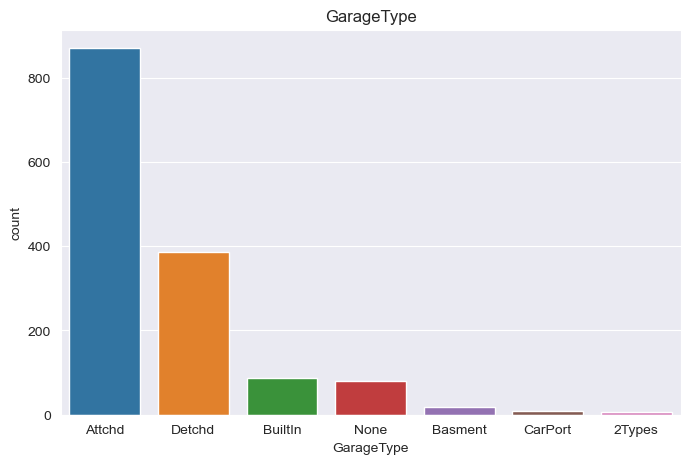

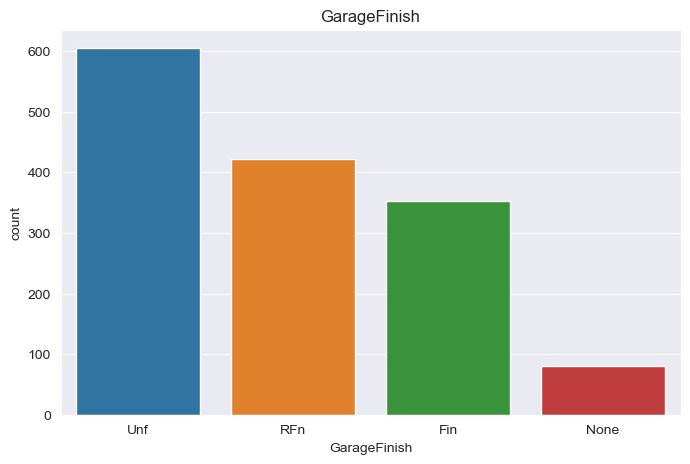

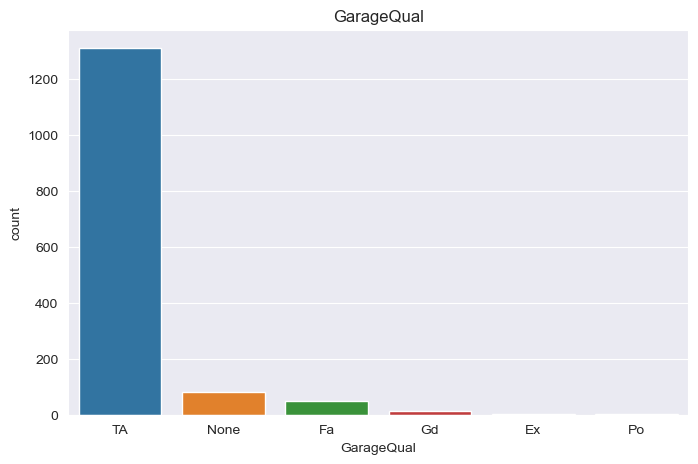

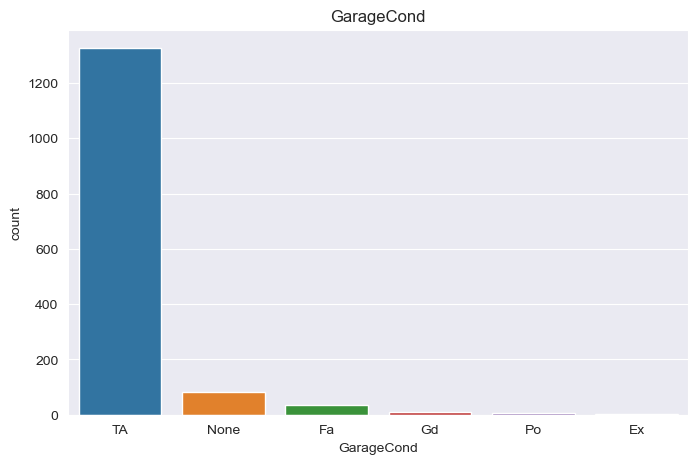

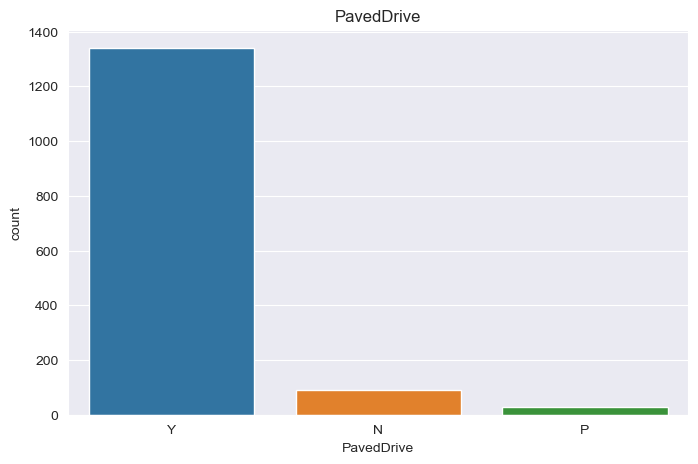

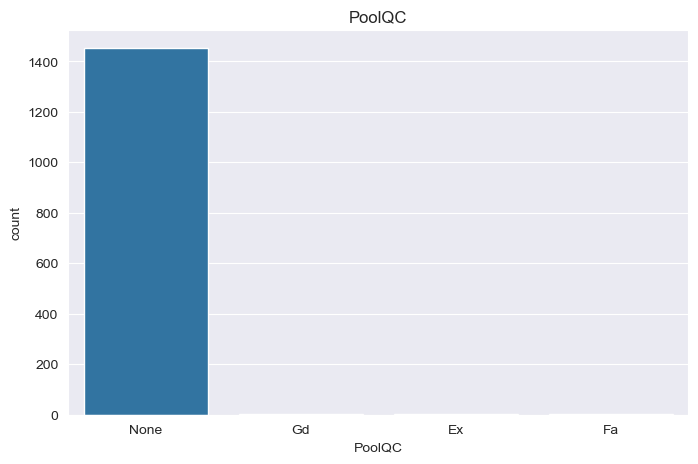

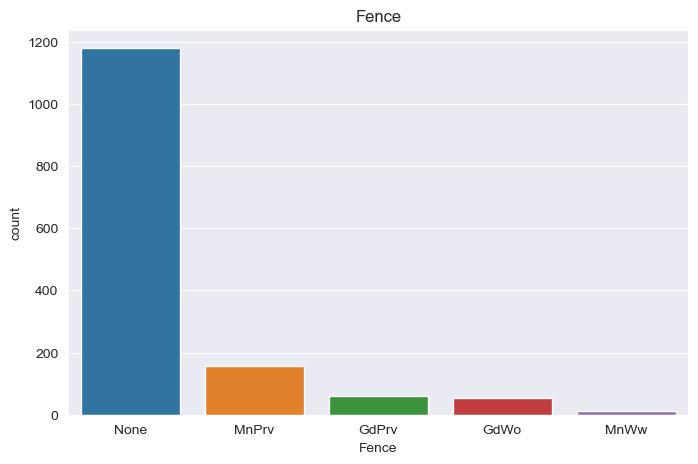

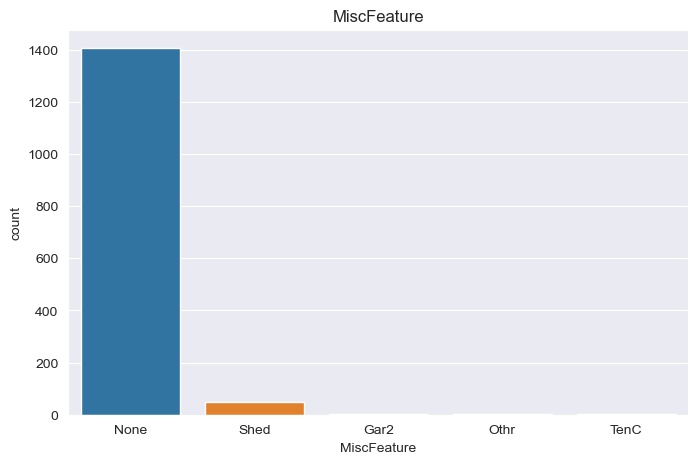

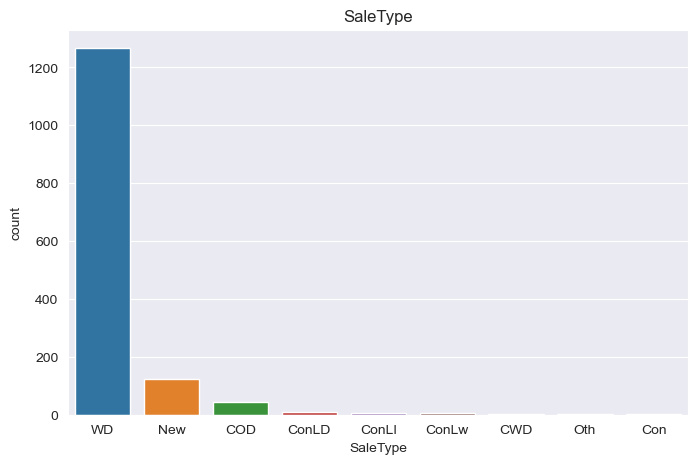

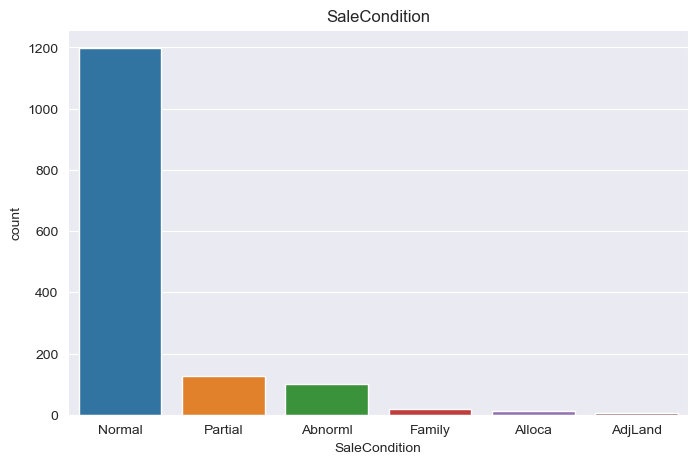

In [2605]:
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col)
    sns.barplot(x = df_cat[col].value_counts().index, y = df_cat[col].value_counts(), data = df_cat)
    plt.show()

Observation : No Single value columns that we need to remove

#### Co-relation between variables

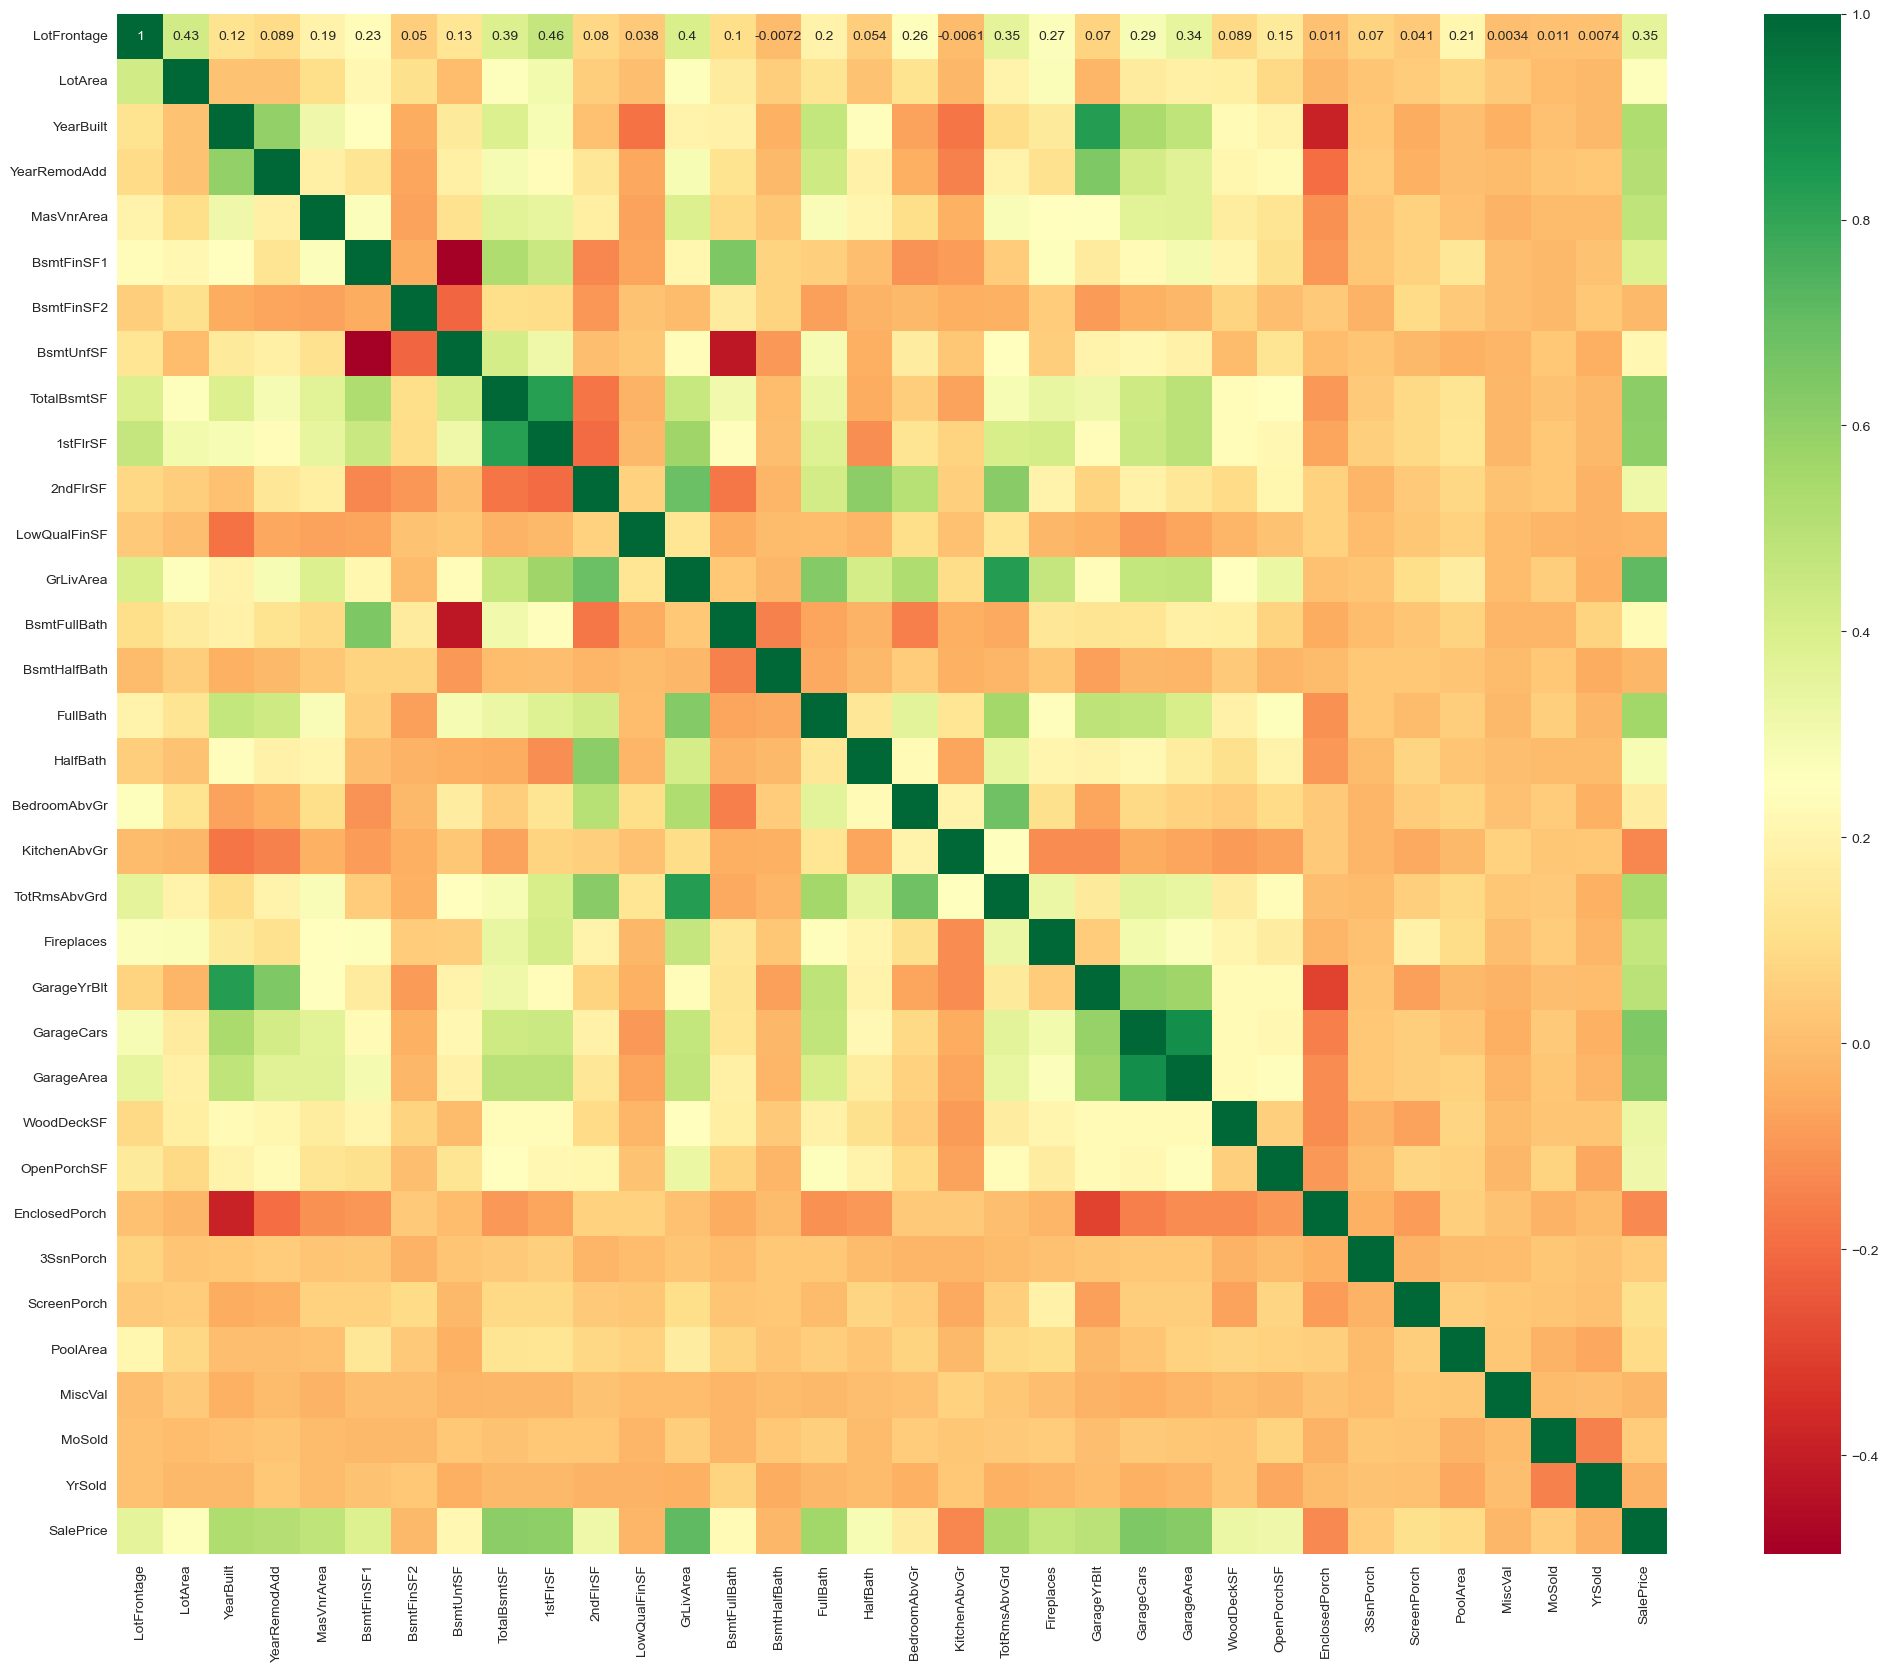

In [2606]:
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

In [2607]:
correlation_matrix = df_num.corr()['SalePrice'].sort_values(ascending=False)
print(correlation_matrix)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Observations:
1. SalePrice (dependent variable) having high co-relation with GrLivArea, GarageCars, GarageArea
2. There are a lot of columns which are co-related with each other
3. We would want to remove colinear columns and hence lasso regression would be useful

### 2. Data Preperation

In [2608]:
df.isna().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
MSSubClass        0
KitchenAbvGr      0
               ... 
ExterCond         0
ExterQual         0
MasVnrType        0
Exterior2nd       0
SalePrice         0
Length: 80, dtype: int64

In [2609]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [2610]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [2611]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

Replace missing values with median 

In [2612]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [2613]:
df.isna().sum().sort_values(ascending = False)

MSSubClass     0
MSZoning       0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

Now there are no missing values in the data

#### Dummy Variable Creation for Categorical variables

In [2614]:
df_cat = df[cat_columns]
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

In [2615]:
df_cat_encoded.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [2616]:
df_cat_encoded.shape

(1460, 256)

#### Outlier Treatment for Numerical Variables

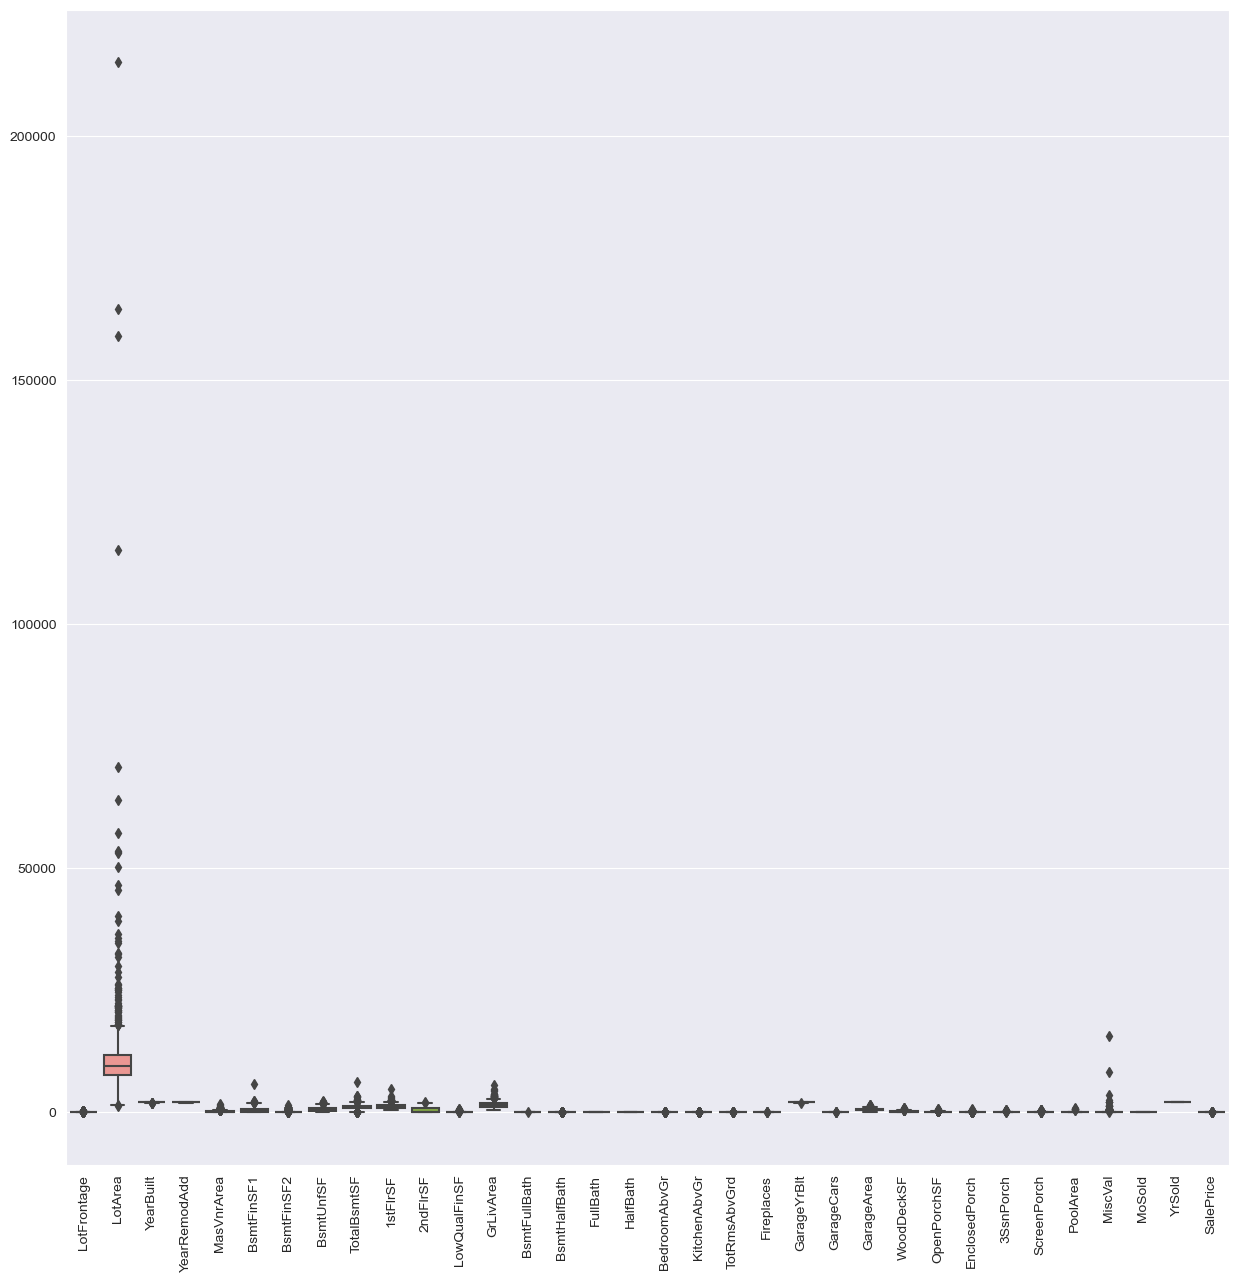

In [2617]:
df_num = df[num_columns]
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

Now let us remove the outliers. Let us strip replace the values with the boundary values

In [2618]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

Now let us use the plot to see how this worked

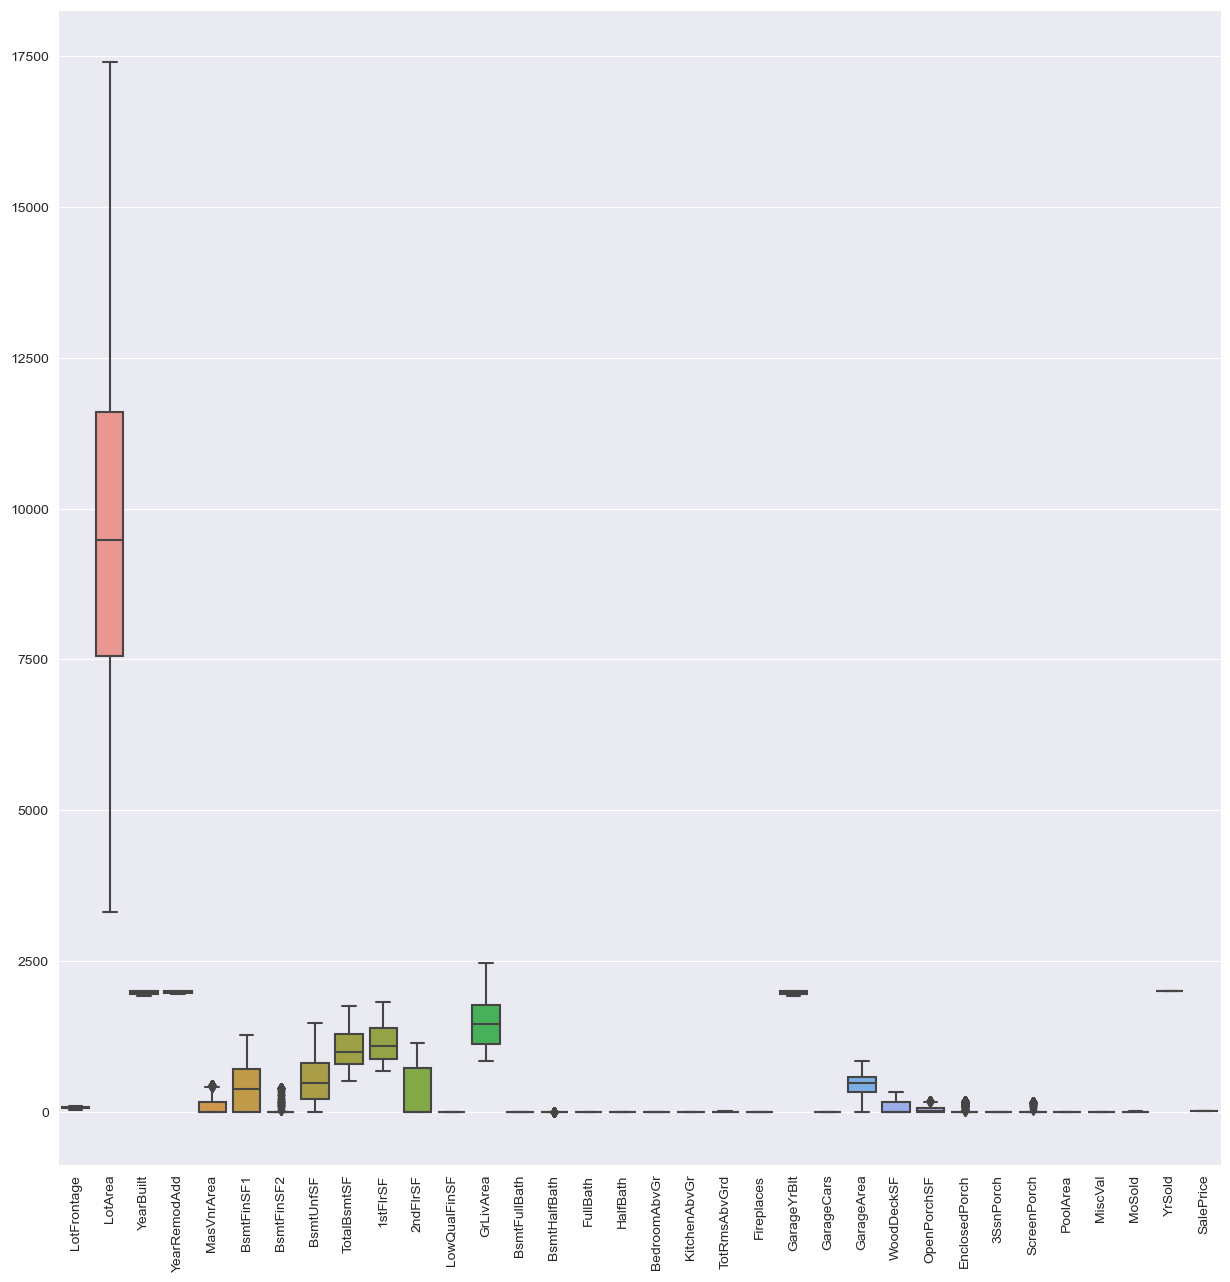

In [2619]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

Now that we have cleaned up both the numerical and categorical variables let us collate them back to single dataframe

In [2620]:
df = pd.concat([df_num, df_cat_encoded], axis=1)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,856.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,1262.0,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,920.0,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550.0,1916,1970,0.0,216,0.0,540,756.0,961.0,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,1145.0,...,False,False,False,False,True,False,False,False,True,False


#### Test Train Split

Now let us split the dependent and independent variables

In [2621]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=84, train_size = 0.7)
num_columns = X.select_dtypes(include=['int64', 'float64']).columns

#### Scaling Numeric Attributes

All the numeric attributes need to be scaled. We are going to use MinMax scaler. Let us first look at the numeric attributes list

In [2622]:
list(num_columns)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [2623]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_test[num_columns] = scaler.transform(df_test[num_columns])

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### 3. Model Training, Prdication & Evaluation

In [2624]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE 
import statsmodels.api as sm
lr = LinearRegression()

Lets use RFE to find the optimal number of parameters to be selected. We are starting with 20 and we try these parameters
1. 20
2. 50
3. 80
4. 110
5. 145 (The default is half of total parameters. In our case the total parameters is 290)

We will then create the model and find the r-squared value for both training and test set. Based on that value we can find the optimum number of parameters to include in the final model

In [2625]:
params_number = [20,50,80,110, None] # Default (None) will be half the number of parameters
for params in params_number:
    
    # Use RFE to select the right number of attributes
    rfe = RFE(lr,  n_features_to_select = params)
    rfe = rfe.fit(X_train,y_train)
    Rfe_Cols = X_train.columns[rfe.support_]
    
    # Select only columns returned by RFE for training data
    X_train_rfe = X_train[Rfe_Cols]
    X_train_rfe = sm.add_constant(X_train_rfe) 
    X_train_rfe.shape
   
    lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()
    print("R-squared value for model created with %s features on training data %s", len(Rfe_Cols), lm.rsquared)

    # Use model to predict on 
    X_test_rfe = X_test[Rfe_Cols]
    X_test_rfe = sm.add_constant(X_test_rfe) 
    X_test_rfe.shape

    predict = lm.predict(X_test_rfe)
    r_squared = r2_score(y_test, predict)
    print("R-squared value for model created with %s features on test data %s", len(Rfe_Cols), r_squared)
    print(" ")

R-squared value for model created with %s features on training data %s 20 0.5891631594903448
R-squared value for model created with %s features on training data %s 20 0.6005166892054474
 
R-squared value for model created with %s features on training data %s 50 0.8820182232960311
R-squared value for model created with %s features on training data %s 50 0.8544894466599366
 
R-squared value for model created with %s features on training data %s 80 0.9147135066000236
R-squared value for model created with %s features on training data %s 80 0.857448898220152
 
R-squared value for model created with %s features on training data %s 110 0.9301749857451729
R-squared value for model created with %s features on training data %s 110 0.8749579712850086
 
R-squared value for model created with %s features on training data %s 144 0.938179808533766
R-squared value for model created with %s features on training data %s 144 0.8763879437234783
 


We can clearly see from above that at 
1. As we keep increasing the number of included parameters the r-squared keeps increasing for test set
2. At 50 params we are already getting a r-squared value of 0.85 for test data. 
3. After that adding more parameters is not increasing the r-squared values much
4. So we can clearly say that we can use RFE and final model can be having 50 params



Lets just extract that model once more and look at the summary

In [2626]:
    rfe = RFE(lr,  n_features_to_select = 50)
    rfe = rfe.fit(X_train,y_train)
    Rfe_Cols = X_train.columns[rfe.support_]
    
    # Select only columns returned by RFE for training data
    X_train_rfe = X_train[Rfe_Cols]
    X_train_rfe = sm.add_constant(X_train_rfe) 
    X_train_rfe.shape
   
    lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()
    print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:33:18   Log-Likelihood:                 696.65
No. Observations:                1021   AIC:                            -1319.
Df Residuals:                     984   BIC:                            -1137.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### 4. Ridge & Lasso Regularisation

In [2627]:
from sklearn.linear_model import Ridge, Lasso

Lets start with Ridge Regularisation

#### Ridge Regularisation

In [2628]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_CV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_CV.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [2629]:
ridge_cv_results = pd.DataFrame(ridge_CV.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
20,9.0,-0.089202,-0.111675,1
21,10.0,-0.089902,-0.111680,2
19,8.0,-0.088463,-0.111729,3
18,7.0,-0.087677,-0.111861,4
17,6.0,-0.086833,-0.112103,5
16,5.0,-0.085913,-0.112501,6
15,4.0,-0.084888,-0.113134,7
22,20,-0.095592,-0.113136,8
14,3.0,-0.083707,-0.114149,9
13,2.0,-0.082256,-0.115865,10


In [2630]:
ridge_CV.best_params_

{'alpha': 9.0}

In [2631]:
# Hyperparameter lambda = 9.0
alpha = 9.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=9.0)

In [2632]:
coefficients = ridge.coef_
variable_names = X_train.columns

# Create a DataFrame to display coefficients and variable names
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 5 significant variables
top_10_variables = coefficients_df.head(10)

print(top_10_variables.Variable)

12                 GrLivArea
8                TotalBsmtSF
124    OverallQual_Very Good
9                   1stFlrSF
119    OverallQual_Excellent
10                  2ndFlrSF
72      Neighborhood_Crawfor
1                    LotArea
76      Neighborhood_MeadowV
3               YearRemodAdd
Name: Variable, dtype: object


In [2633]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.008915561462685151


In [2634]:
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9349586878227794


In [2635]:
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.9247573409439602


So the optimal Alpha Value for Ridge Regression is 9

#### Lasso Regularisation

In [2636]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2637]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.066811,-0.079043,1
3,0.0004,-0.065583,-0.079164,2
2,0.0003,-0.064152,-0.079578,3
1,0.0002,-0.062341,-0.080523,4
5,0.001,-0.072412,-0.081440,5
0,0.0001,-0.059802,-0.082699,6
6,0.002,-0.080153,-0.086865,7
7,0.003,-0.085811,-0.091262,8
8,0.004,-0.090945,-0.095474,9
9,0.005,-0.095403,-0.099468,10


In [2638]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [2639]:
alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0005)

In [2640]:
coefficients = lasso.coef_
variable_names = X_train.columns

# Create a DataFrame to display coefficients and variable names
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 5 significant variables
top_10_variables = coefficients_df.head(10)

print(top_10_variables.Variable)

12                 GrLivArea
119    OverallQual_Excellent
8                TotalBsmtSF
124    OverallQual_Very Good
2                  YearBuilt
72      Neighborhood_Crawfor
22                GarageCars
87      Neighborhood_Somerst
76      Neighborhood_MeadowV
1                    LotArea
Name: Variable, dtype: object


In [2641]:
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.008307859110015869


In [2642]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.9296882923718488
The r2 value of train data is  0.9296882923718488


In [2643]:
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.9298860298236032
